In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm
import time

from data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
!mkdir datasets
!bash get_datasets.sh 

--2019-05-07 22:34:36--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Auflösen des Hostnamens www.cs.toronto.edu (www.cs.toronto.edu) … 128.100.3.30
Verbindungsaufbau zu www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 170498071 (163M) [application/x-gzip]
Wird in »cifar-10-python.tar.gz« gespeichert.

cifar-10-python.tar 100%[===================>] 162,60M   179KB/s    in 14m 16s 

2019-05-07 22:48:53 (195 KB/s) - »cifar-10-python.tar.gz« gespeichert [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [3]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    # TODO: set the proper path to teh dataset
    cifar10_dir = 'datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    print(X_train.shape)
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

(49000, 32, 32, 3)
Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


# Task 1: Softmax and Cross Entropy Loss

In [ ]:
def softmax_naive(W, X):
    """
    (1P)
    Softmax function, naive implementation (with loops)

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.

    Returns:
    - class probabilities of shape (N, C)
    """
    # Initialize the loss and gradient to zero.
    probabilities = np.zeros((X.shape[0], W.shape[1]), dtype=np.float)

    #############################################################################
    # TODO: Compute the softmax using explicit loops.                           #
    # If you are not careful here, it is easy to run into numeric instability.  #
    #############################################################################
    for n in range(len(X)):
        for e in range(len(X[n])):
            
    #############################################################################
    #                          END OF YOUR CODE                                 #
    #############################################################################
    return probabilities


def softmax_loss_naive(W, X, y, reg):
    """
    (1P)
    Softmax (Cross Entropy) loss function, naive implementation (with loops)

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
    that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)

    #############################################################################
    # TODO: Compute the softmax loss and its gradient using explicit loops.     #
    # Store the loss in loss and the gradient in dW. If you are not careful     #
    # here, it is easy to run into numeric instability. Don't forget the        #
    # regularization!                                                           #
    #############################################################################
    pass
    #############################################################################
    #                          END OF YOUR CODE                                 #
    #############################################################################

    return loss, dW


def softmax_vectorized(W, X):
    """
    (1P)
    Softmax function, vectorized version (without loops).

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.

    Returns:
    - class probabilities of shape (N, C)
    """
    # Initialize the loss and gradient to zero.
    probabilities = np.zeros((X.shape[0], W.shape[1]), dtype=np.float)

    #############################################################################
    # TODO: Compute the softmax using no explicit loops.                        #
    # If you are not careful here, it is easy to run into numeric instability.  #
    #############################################################################
    pass
    #############################################################################
    #                          END OF YOUR CODE                                 #
    #############################################################################
    return probabilities
    
    
def softmax_loss_vectorized(W, X, y, reg):
    """
    (1P)
    Softmax (Cross Entropy) lossits  function, vectorized version (without loops).

    Inputs and outputs are the same as softmax_loss_naive.
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)

    #############################################################################
    # TODO: Compute the softmax loss and its gradient using no explicit loops.  #
    # Store the loss in loss and the gradient in dW. If you are not careful     #
    # here, it is easy to run into numeric instability. Don't forget the        #
    # regularization!                                                           #
    #############################################################################
    pass
    #############################################################################
    #                          END OF YOUR CODE                                 #
    #############################################################################

    return loss, dW



In [ ]:
# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

In [ ]:
# Now that we have a naive implementation of the softmax function,
# implement a vectorized version in softmax_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
probs_naive = softmax_naive(W, X_dev)
toc = time.time()
print('naive loss computed in %fs' % ( toc - tic))

tic = time.time()
probs_vectorized = softmax_vectorized(W, X_dev)
toc = time.time()
print('vectorized probs computed in %fs' % (toc - tic))

# we use the Frobenius norm to compare the two versions of the probility computation.
probs_difference = np.linalg.norm(probs_naive - probs_vectorized, ord='fro')
print('probs difference: %f' % probs_difference)

In [ ]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

# Task 2: Training softmax classifer

In [27]:
class SoftmaxClassifer(object):
    
    def __init__(self, num_features, num_classes, random_seed=42):
        # Initialize a random softmax weight matrix. Will be used to compute the loss.
        self.rs = np.random.RandomState(random_seed)
        self.W = self.rs.randn(3073, 10) * 0.0001

    
    def predict(self, X):
        """
        Predict teh class label for each sample in X
        Inputs:
            - X: A numpy array of shape (N, D) containing a minibatch of data.
        Returns:
            - predicted class labels of shape (N,)
        """
        predicted_labels = -np.ones(X.shape[0], dtype=int)
        #############################################################################
        # TODO: Predict the class labels for the given samples X using the          # 
        # current weight matrix W                                                   # 
        #############################################################################
        for i in range(len(X)):
            print(np.dot(np.transpose(self.W), X[i]))
        #############################################################################
        #                          END OF YOUR CODE                                 #
        #############################################################################
        return predicted_labels

class Optimizer(object):
    def __init__(self, classifier, regularization_strength):
        self.classifier = classifier
        self.reg = regularization_strength
    

class RandomSearch(Optimizer):
    
    def train(self, X, y, nb_iter=100, step_size=0.0001):
        loss_history = []
        best_loss = float("inf")
        for it in tqdm(range(nb_iter)):
            loss = 1e9
            #############################################################################
            # TODO: implement Random Search by randomly guessing the values \
            # of weight matrix self.classifier.W  at every iteration.
            # Update self.classifier.W only if loss decreases.
            # Use softmax_loss_vectorized to compute loss at each iteration.
            #############################################################################
            guessW = np.random.rand(len(X[0], 10))
            loss = softmax_los_vectorized(guessW, x, y, self.reg)
            if loss < best_loss:
                best_loss = loss
                self.classifier.W = guessW
            #############################################################################
            #                          END OF YOUR CODE                                 #
            #############################################################################
            loss_history.append(loss)

        assert len(loss_history) == nb_iter
        return loss_history
    
    
class RandomLocalSearch(Optimizer):
    
    def train(self, X, y, nb_iter=100, step_size=0.0001):
        loss_history = []
        best_loss = float("inf")
        for it in tqdm(range(nb_iter)):
            loss = 1e9
            #############################################################################
            # TODO: implement Random Local Search. 
            # Update self.classifier.W only if loss decreases.
            # Use softmax_loss_vectorized to compute loss at each iteration.
            #############################################################################
            guessW = np.random.rand(len(X[0], 10)) * step_size + self.classifier.W
            loss = softmax_los_vectorized(guessW, x, y, self.reg)
            if loss < best_loss:
                best_loss = loss
                self.classifier.W = guessW
            #############################################################################
            #                          END OF YOUR CODE                                 #
            #############################################################################
            loss_history.append(loss)
        
        assert len(loss_history) == nb_iter
        return loss_history
    
    
class GradientDescent(Optimizer):
    """
    Optimier which uses analytical gradients to optimize weights W.
    """
    
    def train(self, X, y, nb_iter=100, step_size=0.0001):
        loss_history = []
        for it in tqdm(range(nb_iter)):
            loss = 1e9
            #############################################################################
            # TODO: implement a simple gradient descent. 
            # Use softmax_loss_vectorized to compute loss and gradient at each iteration.
            # Update self.classifier.W only using the computed gradient at each iteration.
            #############################################################################
            pass
            #############################################################################
            #                          END OF YOUR CODE                                 #
            #############################################################################
            loss_history.append(loss)
        
        assert len(loss_history) == nb_iter
        return loss_history

In [28]:
num_features = X_train.shape[1]
num_classes = y_train.max() + 1

## Training the clasifiers 
### TODO: Use cross-validations to find the optimal hyperparameters for training.


[ 0.34117935 -0.16721209  0.355255    0.52423125  0.3925725  -0.23329086
  0.24325531  0.55174167 -0.08002747 -0.46535982]
[ 0.35371275  0.01204558 -0.02120266 -0.31317632 -0.19645516  1.06882409
 -0.01827463 -0.46815658  0.22019614 -0.21507587]
[ 0.23621295  0.09056985 -0.61709034 -0.4644954   0.30285325 -0.50922503
 -0.33099623  0.11640079  0.08562397  0.78853962]
[ 0.09505889 -0.22169053 -0.06921779  0.60656324  0.27855704  0.10549384
  0.10531618  0.23092627 -0.07290602 -0.19584216]
[ 0.06319057 -0.04497918 -0.09697016  0.20401956  0.10484172 -0.09587233
 -0.1581905   0.12411009 -0.12831807 -0.0395144 ]
[ 0.10778714 -0.3227891   0.23498948  0.36780245  0.30714853 -0.26293816
  0.11391649 -0.00532168 -0.72172382  0.22426683]
[-0.10757453  0.17334195  0.39852342 -0.1289497   0.32065142 -0.20204479
 -0.10686023 -0.01777323  0.11176672  0.10810593]
[ 0.00723218 -0.06395591  0.37473132 -0.02331351 -0.48492667 -0.09804059
 -0.18118228 -0.4374623  -0.41699269 -0.34397776]
[-0.08363735  0

[ 0.04870446 -0.34197029 -0.50604499 -0.38979465  0.29686596  0.16046016
 -0.44023491  0.37717934  0.75152195 -0.20035634]
[ 0.46842097  0.17180051 -0.38108594  0.15893899  0.37483863  0.06866097
  0.31614871  0.66536552 -0.31785278 -0.12918858]
[-0.60485635 -0.43050496 -0.07459884  0.44736992  0.40133129  0.10223337
  0.57828681 -0.26402971 -0.01439246  0.00442654]
[ 0.06857368 -0.42558148 -0.69540552 -0.9314146   0.06393123  0.15168563
 -0.10837947 -0.11836507  0.41971326  0.09951125]
[-0.01254606  0.24049433  0.12873747  0.2321588   0.10218127 -0.11673257
  0.14872095  0.29851379 -0.0229727  -0.10593002]
[ 0.06211184 -0.3220617   0.30414708  0.32623676 -0.07212971  0.14728586
 -0.06439351 -0.36340946  0.12269683 -0.29918857]
[ 0.08491737 -0.39020336  0.77203294  0.47306179 -0.4562295   0.3363922
 -0.31550847 -0.36135017  0.1584513  -0.20926915]
[-0.3297601   0.0723443  -0.3704274  -0.42233027  0.79257962 -0.098817
  0.24199019 -0.71902079 -0.00718102  0.46091539]
[ 0.10483164  0.434

[ 0.64456952 -0.09904546 -0.10514371 -0.01446677  0.57359656 -0.17984212
 -0.39565927 -0.04464915  0.04179743  0.32283462]
[ 8.00044930e-02  1.90222561e-02 -4.18456994e-01 -8.52156618e-01
 -7.08302176e-04  1.19440555e-01  4.37212948e-01 -2.93781978e-01
  3.63157176e-01  2.68931260e-01]
[ 0.02587884 -0.01044201 -0.31723112 -0.62067708 -0.04633139 -0.16248152
  0.60686654 -0.19291665 -0.00381122  0.4543669 ]
[-0.1674446   0.36245047 -0.32158435 -0.20336371  0.10276157  0.20530401
  0.08657886 -0.24768761 -0.17574455  0.1468421 ]
[ 0.2951849   0.15796538 -0.28668189 -0.02445732  0.08860367 -0.06131165
 -0.3019273   0.12892855  0.08745425  0.08099934]
[ 0.02947515  0.30219537  0.08511288 -0.05638009 -0.04280006 -0.19068462
 -0.18467563  0.22267502  0.08782162 -0.12326145]
[ 0.00176097 -0.44531399  0.43825542  0.27171593 -0.21205962  0.44097131
 -0.26222614 -0.05021346  0.33084817  0.0348861 ]
[-0.05097531  0.46529018  0.14088166 -0.08735416 -0.11123924 -0.00494017
  0.18710178  0.42093173 

[-0.05244455  0.011423    0.0362019   0.09501551 -0.00784192  0.17847892
  0.38098579 -0.49074853 -0.84567248  0.07169362]
[ 0.15009491 -0.15941098 -0.34318453 -0.20819102  0.23939113 -0.2524129
 -0.30118693 -0.39710922 -0.08519439  0.75504612]
[ 0.10086362  0.0050063  -0.58448964  0.06757166  0.03649715  0.11472147
  0.21648603 -0.33441704  0.21577035  0.25208596]
[-0.55980737  0.3018052   0.26064266  0.00918985 -0.14631395 -0.15196895
 -0.32521193  0.32441734  0.07640295 -0.18590567]
[-0.20278152 -0.15524228 -0.20549232 -0.28845615  0.05767327  0.23128446
 -0.18726246  0.22216347  0.10910001  0.13096113]
[-0.87110255 -0.26973682  0.47013432 -0.14908332 -0.24403802 -0.87396886
 -0.21523416  0.24629617 -0.02542465  0.25291571]
[ 0.06215322 -0.3376632   0.6505328   0.44548871 -0.21605928  0.15986789
 -0.24318695 -0.1891119  -0.23981759 -0.57050309]
[-0.0187637  -0.20441758  0.34850837  0.15095097 -0.14494991  0.0020835
 -0.16618711  0.0272694   0.11019539 -0.21694537]
[ 0.2334385   0.41

[-0.20356154  0.29198026  0.10956342 -0.3786662  -0.33085848 -0.03697636
  0.46742176  0.0810002  -0.00558808  0.2685103 ]
[-0.01300239 -0.17996848  0.02480428  0.2634001  -0.45507527  0.23266926
 -0.42569077 -0.27761216 -0.03281042  0.10603105]
[-0.04261637  0.33259763 -0.28385672 -0.27427012  0.04913253  0.42257552
  0.76475807  0.02235759  0.57244275  0.50485058]
[-0.65972054 -0.23515961  0.57490581 -0.10746104 -0.19799462 -0.78080684
 -0.79733287  0.1246369  -0.4350653   0.19072184]
[ 0.37949918 -0.16962468 -0.4125685  -0.10332934  0.51232497  0.00369084
  0.18661677  0.31128758  0.06057548  0.26829725]
[-0.24586147  0.08765232  0.10636196 -0.15547869 -0.38848146 -0.2726916
  0.1485259   0.15684852  0.09519713  0.44909611]
[-0.34149162  0.24811219  0.13153977  0.44783775 -0.36042076 -0.07560417
  0.04293641  0.31288977 -0.0600862   0.0006089 ]
[-0.60350148  0.04755145  0.94887703  0.11230336 -0.60759723  0.10166982
  0.19026965  0.16906749 -0.02710934  0.19712756]
[ 0.08797237  0.4

[ 0.31646443 -0.75123646 -0.2445983  -0.12059485  0.10111078  0.06029144
 -0.26834421 -0.05006657 -0.05152232  0.25243037]
[ 1.02028012 -0.08663218 -0.50263137 -0.01646516 -0.31240979  1.25255746
  0.64069377  0.5548961   0.14571417  0.44030592]
[ 0.13427121 -0.41196602  0.18377999  0.20837209  0.1217863  -0.25863239
  0.10349725  0.76781073  0.85371897 -0.18638957]
[ 0.26972211 -0.11916041 -0.23925495  0.40934299  0.54652884  0.26929064
 -0.19910314 -0.16568935  0.31687398 -0.05528818]
[ 0.20328187  0.26858317  0.36145353  0.29426707 -0.17321252  0.20563883
  0.61151554  0.02795269 -0.71419828 -0.0568874 ]
[ 0.03318925  0.24815243 -0.11993736 -0.08931744 -0.18218672  0.01401322
  0.20920093  0.24447637 -0.09313899 -0.18851835]
[ 0.20594202 -0.00913084 -0.82716111 -0.31480964  0.29262608  0.43043324
  0.17229864 -0.06367433  0.32311527  0.748753  ]
[ 0.19929428 -0.22165949  0.39557345  0.34008198 -0.28285322  0.00285415
 -0.18794767  0.14060692 -0.20219964 -0.45828714]
[-0.97673819 -0.

[ 0.07739828  0.0462116  -0.50189538 -0.35862116  0.10784962  0.2391553
 -0.15737355 -0.05304535  0.04091615  0.07586667]
[ 0.11771013 -0.20431256 -0.53155684 -0.01099277  0.31641862  0.38966258
  0.06569187 -0.2010851   0.09571642  0.60196763]
[-0.11763012 -0.54389794  0.42558015  0.50026731  0.08320582  0.02791867
  0.02529587  0.20011217 -0.05598175 -0.43894866]
[-0.1264573  -0.26317998  0.61762456  0.59438887 -0.36451595  0.18009624
 -0.40107475  0.5543353  -0.25349091 -0.24506594]
[ 0.32445045 -0.00499996  0.14525795  0.28932015 -0.11047744  0.11867767
 -0.56999022 -0.16048541 -0.16204143 -0.29657778]
[-0.05900072  0.09429731 -0.47873157 -0.39519134 -0.20732542  0.13427703
  0.1807077   0.10813111  0.11050005  0.26457763]
[ 0.01611634 -0.55961884  0.45516803  0.4591698   0.20062601  0.26268157
  0.49430668 -0.10340938  0.23682563  0.02760164]
[ 0.27875884  0.19564825 -0.13122979  0.09941696 -0.01609527 -0.16569665
  0.05166304  0.17113134 -0.04285992 -0.25474926]
[-0.3470475  -0.0

[-0.4154881   0.52924989  0.14057063 -0.26433265 -0.36914617 -0.27200622
  0.63965153 -0.4545357  -0.19765152 -0.06944774]
[ 0.11369907  0.03181264 -0.06850582  0.24781024  0.03700206  0.2834828
 -0.65592421  0.3495692  -0.03898901  0.40165398]
[-0.33315011 -0.01252623  0.05720818 -0.53406768  0.27516589  0.01698146
 -0.15201784  0.16840398  0.14750943  0.29369386]
[-0.31711818  0.34906411 -0.00556872 -0.3222494   0.0720241  -0.20376282
  0.1429623  -0.06961865  0.25689573  0.00449301]
[-0.09701251  0.25514485  0.1536933  -0.12449514 -0.1342961   0.03100238
  0.33069875  0.22553507 -0.1423407  -0.50430684]
[-0.06766129  0.0831502   0.14232182  0.20887651  0.45227652  0.02363307
  0.2104282   0.03256889 -0.03628503  0.00483134]
[ 0.66792633  0.64231773 -1.06212679 -0.30276194  0.33402978  0.61895856
  0.39994821 -0.07107558  0.25511569 -0.20948222]
[ 0.15784626 -0.15132586 -0.0685779  -0.03572052 -0.69005534  0.07853515
 -0.43604411 -0.09007324  0.15719109 -0.34404805]
[-0.08668823 -0.0

[ 0.16425852 -0.11754046 -0.06421637  0.29515878  0.04109544  0.3691097
 -0.27827372  0.14092763  0.10811148 -0.53868825]
[-0.72411897  0.2272333   0.03521789  0.02398126 -0.03290524 -0.06349055
  0.23724772 -0.09413929  0.06815556 -0.12486251]
[-0.00610263  0.23612353 -0.32977763 -0.34593249  0.23979923  0.02101386
 -0.03793074 -0.07479951  0.14769239  0.21110299]
[ 0.080385   -0.01832465 -0.51523827 -0.30216688 -0.28304532  0.33489951
  0.60374796 -0.49068592 -0.10178524 -0.22968371]
[-0.12537126 -0.43214391  0.16775654  0.12502672  0.21781502 -0.50663287
 -0.15235723 -0.06548501  0.63870686  0.53304568]
[ 0.13884151  0.07130869  0.07532474 -0.12898333 -0.22157148  0.07848906
  0.32013112  0.18631775  0.06487082 -0.35261524]
[-0.15745325  0.08349179  0.31677589  0.08498245  0.11385261 -0.08494935
 -0.10783614 -0.04903229  0.01525169 -0.16617989]
[ 0.15099354  0.00241684  0.36857672 -0.17752964 -0.18925331  0.54308849
 -0.37296674 -0.0984229  -0.41450647 -0.35331002]
[-0.18047415  0.1

[ 0.46993949 -0.6579803  -0.34256512  0.41175632 -0.24655426  0.45763666
  0.41571686 -0.22164372 -0.82880482 -0.50611601]
[ 0.87995627 -0.02245914 -0.5947309  -0.16614947  0.17489471  0.14481082
 -0.50035571  0.26275667  0.40793511  0.05467176]
[ 0.58680589  0.236652   -0.46507471 -0.30486471 -0.01289576  0.2803338
  0.27005379  0.0125206  -0.0986256  -0.02656879]
[-0.30786936  0.44384342  0.34858167 -0.59385103 -0.43278105 -0.56456369
  0.03701525 -0.50242926 -0.79419341  0.2962165 ]
[ 1.00020667 -0.15390469 -0.40816426  0.01149433 -0.24998185 -0.23136849
  0.05365167 -0.22083283  0.10801652 -0.96766613]
[-1.31778581  0.19554883  0.03543291 -0.63385516  0.24892579 -0.69880899
 -0.46848931  1.06173551  0.42528765 -0.02143489]
[ 0.20950921  0.39692258 -0.22695143 -0.47864997 -0.17815673  0.11921114
 -0.0026325  -0.17854266 -0.42750788 -0.01397534]
[ 0.09517303  0.50790722 -0.22280322  0.29039613  0.12450649  0.38964009
 -0.00514552  0.75871439  0.74837337 -0.35633197]
[-0.45597471  0.2

 -0.37138702 -0.15112229  0.02584154 -0.01612432]
[-0.33992178 -0.34950026  0.08873496  0.59396012 -0.08411357  0.26524225
  0.58542563  0.07968471  0.39347591 -0.11621097]
[-0.05336483  0.19798222 -0.12920398 -0.09757766  0.02857523  0.07309919
 -0.07182671 -0.08411196  0.35863473  0.4160267 ]
[-0.04992128  0.23495292 -0.20365297 -0.47013813  0.14455147 -0.32551915
  0.31316168 -0.1521555  -0.23615669  0.21660325]
[ 0.2969282   0.02563711 -0.0370533  -0.29454541  0.13967978 -0.03733734
 -0.38496424  0.12262898  0.29953632  0.39987277]
[ 0.09976317 -0.07846638 -0.35112717  0.11337682  0.3846659  -0.04390736
 -0.08041389  0.03029533  0.04156302 -0.00768679]
[ 0.12070036 -0.2221468  -0.26877198  0.48177216  0.14209677  0.10759717
 -0.1674516  -0.14910353  0.1618863   0.68172963]
[ 0.04689959 -0.21610967  0.22912274  0.58929742 -0.00678353  0.11251416
 -0.19201833  0.02851763  0.10780329 -0.26613969]
[-0.56364396 -0.2856051   0.56583559  0.41007021 -0.49766952 -0.26431074
 -0.33179618  0.

[ 0.11899908  0.00222388  0.44723733  0.08711755 -0.1659232   0.45259833
  0.51847361  0.06972176 -0.55569921 -0.77104527]
[-0.00795095 -0.05144328 -0.50085566 -0.18687437  0.26377783 -0.07333935
 -0.57841529 -0.44016069  0.28748127  0.25098898]
[-0.0656549   0.08822262 -0.43762395 -0.37230608  0.10800469 -0.31453688
 -0.2958809  -0.09303287  0.07980878  0.59549672]
[ 0.06165343  0.02534449  0.29099128 -0.36708858  0.57538811 -0.58436478
  0.29857137 -0.01916273  0.15076552 -0.76549671]
[ 0.16977508  0.24694846 -0.23165265 -0.57541485  0.12758268 -0.20842279
 -0.08739627 -0.20478008 -0.32263958  0.50787988]
[ 0.0053351  -0.26370442  0.46156725  0.19176822  0.07747895  0.10516917
  0.35308613  0.09678183 -0.16189046 -0.73309636]
[ 0.35716133  0.32658598 -0.34201689 -0.01760267  0.11087372  0.56385805
  0.25166231  0.54241699  0.52684699 -0.07765039]
[ 0.15202077  0.1092068  -0.17341129  0.15800554 -0.42427475  0.15211266
  0.28034757  0.31843411 -0.05994715  0.1551916 ]
[ 0.7132569  -0.

[-0.17653081 -0.1154372   0.17410225 -0.08231921 -0.14693986 -0.09032941
  0.18446412  0.055048   -0.1394174   0.05632949]
[-0.1932042   0.2231892   0.18363656 -0.037173   -0.0801845  -0.03493969
 -0.02790081  0.29626124 -0.31303273 -0.30403854]
[ 0.78464678 -0.57207378 -0.46805016  0.28644271  0.3827426  -0.28820073
  0.06331712 -0.18235354 -0.57009638 -0.02710597]
[ 0.37769224 -0.2540154   0.11128819 -0.40573708 -0.2017045  -0.16794017
 -0.36074547  0.22341626  0.33741232  0.94362132]
[-0.51136408 -0.07982425  0.56430458  0.25998791 -0.26874997 -0.10954348
  0.28774626  0.02706144 -0.44188285 -0.36412765]
[ 0.13752043  0.28984058 -0.41850061 -0.17206933 -0.00441494  0.03491393
  0.0877181   0.11639965 -0.23622823  0.2156743 ]
[ 0.09771844 -0.26406734  0.0782573   0.52804867  0.06842715 -0.00880836
 -0.56947284  0.07583305  0.10478669 -0.56415932]
[-0.50090765 -0.05143557 -0.16114559 -0.17661733 -0.04681035 -0.45042431
 -0.03794301  0.22522148  0.9621035  -0.30130064]
[-0.3529872   0.

[ 0.0706865  -0.01055836 -0.11342261 -0.15169092 -0.13026151 -0.13495136
 -0.2404862   0.05369095 -0.04712847  0.29272814]
[-0.27785854  0.06117751  0.39633456  0.37407046 -0.05636624 -0.40686544
  0.05696973 -0.00050812 -0.24679165  0.07435351]
[-0.01982427  0.14001681 -0.33685338  0.17169816  0.01570021  0.12385732
  0.02705585 -0.31817687  0.85949695  0.23708088]
[ 0.4761232  -0.25874746 -0.45012052 -0.47631975 -0.0844068   0.24030941
 -0.43885234  0.72949555  0.51518376  0.32992634]
[ 0.46449867  0.49851187 -0.57049824 -0.44203546 -0.49364686  0.46622624
 -0.22551195  0.54286358 -0.46441878  0.09521416]
[-0.06222371  0.13006201  0.08574597  0.10252672  0.11327184  0.02537072
  0.2844386  -0.04120004 -0.29602315 -0.13023443]
[ 0.29768198  0.09020711 -0.32385904 -0.01502201 -0.76270764  0.10982134
  0.07918867  0.1632264   0.39639373 -0.13826305]
[ 0.37867615 -0.06758074  0.19681931  0.75239736  0.08802566 -0.30056068
 -0.64427607  0.03161079 -0.6759716  -0.21371021]
[ 0.01053524  0.

[ 0.72199084 -0.08957064 -0.15144983  0.42370502  0.30955427  0.46388381
 -0.31064729 -0.12915932  0.98343426  0.51738222]
[-0.17225564 -0.29216171  0.45948367  0.31126515 -0.03511542 -0.25022078
 -0.38428201  0.30124352  0.01042738 -0.46341885]
[ 0.00105186 -0.21302103 -0.1845454   0.32707707  0.38447741  0.03250018
  0.0010409   0.49199852  0.12601016 -0.24671087]
[ 0.04720755  0.11194027 -0.35528195 -0.50110678 -0.16942564  0.02633045
  0.36653056 -0.11320947 -0.05328666  0.0864815 ]
[ 0.17402136 -0.17934048  0.53159317  0.27774767 -0.02944957  0.52451428
 -0.08529475 -0.02960986 -0.17120055 -0.08153827]
[ 0.51672049 -0.03914034 -0.53690313 -0.20945917 -0.07305708  0.33374316
  0.13749778 -0.15845674  0.39449888  0.29521528]
[ 0.35975637  0.18171627 -0.63902896 -0.31860337 -0.01087113  0.28336239
  0.50514322 -0.5258703   0.00756133  0.02689797]
[-0.4163829  -0.06918733 -0.59917218 -0.18545684  0.00704286  0.47465703
 -0.17752968  0.01758134  0.14714125 -0.19979122]
[ 0.22110355 -0.

[-0.07877383  0.01349067  0.20003301  0.23430804  0.04812819 -0.20235401
  0.20417732  0.18275187  0.09867972 -0.03320509]
[-0.68558892 -0.1971409  -0.25621497  0.02092985  0.1038328   0.3553517
  0.10630174 -0.19878248 -0.4167474   0.06424316]
[-0.02747099  0.03205694  0.45216688  0.29301659 -0.12773292 -0.29261417
 -0.40780947 -0.3277503   0.16559419 -0.38296132]
[ 0.30861769  0.0075013   0.56479301  0.83267406 -0.07315016  0.33120034
  0.29001042 -0.33574691 -0.56860228 -0.82719761]
[ 0.06397922 -0.01541011 -0.0501538  -0.06507993  0.21785063 -0.0419533
  0.05764597 -0.45832049 -0.23456736 -0.23359088]
[ 0.28114233 -0.11021138 -0.46062666  0.11941107  0.07825653  0.43252489
  0.02994995  0.39370799  0.03383967 -0.18841444]
[ 0.09729499 -0.60539215 -0.6502803  -0.0722574   0.05195655 -0.07516364
 -0.07274218  0.02812481  0.3415754   0.34430607]
[-0.32473627  0.10118734  0.48134563 -0.22665092 -0.17322156 -0.4457668
 -0.26466316  0.02802531 -0.27571009 -0.12355872]
[ 0.29799574 -0.004

[ 0.19067092 -0.00364728  0.35900956  0.03284237  0.03448103 -0.2856785
  0.44730705 -0.4414056   0.04048554  0.05886025]
[ 0.4111483  -0.28088954 -0.3069048   0.05145765  0.28960471  0.12997794
 -0.11609208  0.07031635 -0.09580468  0.35905874]
[-0.04090799 -0.04008996 -0.82465203 -0.4088656  -0.1025881   0.17894709
  0.01420531 -0.34608377  0.02700137  0.72832508]
[-0.09820947  0.35945302 -0.15540656  0.78223557  0.40806271  0.84706714
  0.71432112 -0.05245428  0.35059409 -0.44507846]
[-0.07638033  0.19769107  0.10659142  0.43384251  0.08982535  0.19453374
  0.30524972  0.15626748 -0.0427431  -0.19352495]
[ 0.17327596 -0.00317063 -0.56305374 -0.39690577  0.29756273  0.10759729
 -0.00679052 -0.30858695  0.21577401  0.39438949]
[ 0.40025413 -0.10556877 -0.31531838 -0.30858103 -0.1302549  -0.01956957
  0.27689301 -0.01443679  0.06345933 -0.1777901 ]
[-0.54361458 -0.61243223 -0.35276979 -0.37200057  0.39344869 -0.4055081
  0.08795612 -0.01711757 -0.44908318  0.16173951]
[ 0.32119172  0.26

[ 0.34543476  0.14586784 -0.427753   -0.23213408 -0.12965896  0.43230329
 -0.29511674 -0.10899552  0.32729402  0.09122841]
[-0.27429888 -0.17732717 -0.29009777 -0.69308254  0.51025752 -0.13180991
 -0.35773262  0.12962788 -0.48988075  1.13161406]
[ 0.1869232   0.39918447  0.79614766  0.59208948 -0.20288243 -0.23450633
 -0.52468021  0.21971157 -0.04298166 -0.4205185 ]
[-0.18155101 -0.14800623  0.02167764 -0.19074679  0.24227293  0.1502113
  0.14549199 -0.38516318  0.03036418  0.0570846 ]
[ 0.25098251 -0.23132571 -0.56091234 -0.18752519  0.43314276 -0.14769386
  0.48363022 -0.167314    0.00699771  0.19766059]
[ 0.27725176 -0.01006229 -0.30131692 -0.28214313  0.03220438  0.05369851
 -0.02775153 -0.030834   -0.54844005  0.34503592]
[ 0.1094701  -0.06171577 -0.2975505   0.11800242  0.22796577  0.12778089
  0.19367692 -0.30371329 -0.00822428 -0.2725601 ]
[-0.24128419  0.03747066  0.33571978 -0.06966848  0.0674319  -0.2422342
  0.28984204  0.19586885  0.15056162 -0.18938935]
[ 0.12267028  0.05

[-0.12927843  0.68837803 -0.4881252  -0.77261686 -0.22755075  0.16086751
  0.4913467  -0.54809019 -0.00975136 -0.07433048]
[ 0.09622704  0.50329063  0.20364798  0.16536318 -0.03021833  0.03235454
  0.07748672 -0.22499249 -0.22019879 -0.09042892]
[ 0.13017826 -0.35730175 -0.34443002 -0.45248472 -0.00783154 -0.71483332
 -0.38152469 -0.18415306  0.25787264  0.77845358]
[ 0.02725678 -0.40985217 -0.40360181  0.10526781 -0.12470223  0.18781811
 -0.67888219  0.25242886  0.45726954  0.45415395]
[-0.05862093 -0.2260611   0.16592005  0.16210786 -0.25569565  0.11316429
 -0.04732064 -0.02307574  0.25104578 -0.40315386]
[-0.04580128 -0.26960516  0.43240727  0.16071612 -0.21799381 -0.67063259
 -0.04712751  0.11808876  0.18595188 -0.37669489]
[ 0.06293027 -0.05299912  0.04744145 -0.0280556   0.23158273 -0.23948204
 -0.18564789  0.39267524  0.25074329  0.26207339]
[-0.4899452   0.06075113  0.27335102 -0.31980073 -0.1414408  -0.30508067
 -0.077837   -0.05752005  0.09659849 -0.3665193 ]
[-0.00614605  0.

[ 0.00139067  0.25749652  0.33153121  0.04378817 -0.0479098   0.35067555
 -0.25238265 -0.13006471 -0.0314281  -0.44291734]
[-0.27964601 -0.26778832  0.37544321  0.15579009 -0.16514947 -0.30978849
 -0.46580534  0.16552097  0.12065728 -0.30014011]
[-0.6098917   0.62949754 -0.09790863 -0.68300837 -0.27640313 -0.37736451
  0.54427265  0.6296971  -0.2178999   0.33016554]
[-0.51384192  0.40805683  0.10744764  0.10576003 -0.41717964 -0.47138161
  0.60868855 -0.16084392  0.07583067 -0.52524787]
[-0.0883423   0.09964718 -0.01254736  0.01328381  0.05405562  0.1331257
  0.31232081  0.10927414 -0.3097267  -0.14331679]
[ 0.12418256 -0.25111337 -0.28990859  0.05254723  0.08695864 -0.24167131
  0.05079372  0.07897905  0.11041662  0.06942608]
[ 0.4555218  -0.21054114 -0.36544957 -0.62179886  0.02526963 -0.20088806
 -0.32509033 -0.10508643 -0.01435147  0.97102895]
[-0.11489829  0.0667179  -0.35641981 -0.63323576  0.0181925  -0.07490047
 -0.09801817 -0.29213736  0.04330716  0.62147179]
[-0.37050305  0.1

[ 0.204163    0.19521245  0.43059961  0.57270787 -0.71090472 -0.05492323
 -0.18682677  0.18116804 -0.16788862  0.25713554]
[-0.3827595   0.09335242 -0.09230705 -0.4821433   0.07351159 -0.22798046
  0.24540822  0.07616709 -0.03610818  0.5084117 ]
[-0.35526207  0.28434012  0.13369235  0.1223171  -0.02401589 -0.13055653
  0.30851594 -0.19418035  0.31787076  0.0864937 ]
[-0.20786898  0.23436416  0.07673482  0.04601805 -0.00965042  0.02815303
  0.24125067 -0.2017301  -0.21695077  0.08374812]
[-0.20461614 -0.17406532  0.38356083  0.45607591 -0.01713059  0.08163217
 -0.50701503 -0.08315174  0.15063319 -0.20713948]
[-0.33221194  0.19628558  0.12518866 -0.14646771 -0.19835966 -0.0786789
  0.30119671 -0.16926311 -0.02310679  0.00234702]
[ 0.31419658  0.2995164  -0.28451948 -0.16897817  0.1334176  -0.26915931
  0.12520368  0.4284113  -0.13182434 -0.08789326]
[-3.07858781e-01  7.76458519e-02  8.45572538e-01  6.49433886e-01
  2.30951713e-01  1.03779770e-01  6.31417835e-04  1.69234299e-01
 -5.113791

  0.09020689 -0.23772478  0.18911356 -0.16604086]
[-0.13053298  0.31815461  0.61457863  0.81542884  0.15573061  0.10372686
 -0.15152996  0.35206893 -0.63818371 -0.7609128 ]
[ 0.21858743  0.42138935 -0.23957704  0.00514004  0.1006833   0.16308802
  0.70391482 -0.24124678  0.06683538 -0.08619381]
[-0.10941722  0.11383324  0.31208517  0.49309023  0.13364879 -0.03026327
  0.33245103  0.19865066 -0.23421946  0.24609317]
[-0.78029181  0.13134632  0.50482535 -0.41252166 -0.36420315 -0.34022929
  0.37782779 -0.11219135  0.23973866 -0.80145324]
[-0.18898339  0.03246267 -0.23930565 -0.29078193  0.41053546 -0.20896921
 -0.09683986  0.4569007   0.22462182  0.2461101 ]
[ 0.18640534 -0.09310059  0.19420956  0.28576147 -0.07974423  0.08236969
 -0.0477355   0.24641978 -0.01079471 -0.15472955]
[ 0.19992743 -0.46432192  0.42192675  0.38085489 -0.10937647  0.03075421
 -0.11599775 -0.31523241  0.04691809 -0.22213792]
[-0.39358871 -0.16073512  0.16350793  0.1163874  -0.09618881 -0.18114811
  0.37185498  0.

[-0.07660539  0.31774313  0.18650167  0.03522328 -0.00095801 -0.16803751
 -0.2886594   0.22861687 -0.0187622   0.0177291 ]
[-0.44498098  0.12486729 -0.28173894 -0.20953182 -0.16182161 -0.31190282
  0.62283118  0.01615029 -0.44320489 -0.11694806]
[-0.16387267  0.16541868 -0.16915591 -0.39329112  0.32717892 -0.61986045
 -0.02124016 -0.61991405  0.28386431  0.22878911]
[-0.09274262  0.18490099  0.06355548  0.27447444 -0.03727528 -0.06133659
 -0.05100494  0.31255029 -0.34981317 -0.21313374]
[-0.25630128 -0.64923318  0.20585561  0.35114938  0.25249936  0.45399256
  0.00551494  0.31087976 -0.08778473  0.00236991]
[-0.12178131  0.04036145  0.36422063  0.00244986  0.08309532 -0.1098871
 -0.16964712  0.18555321 -0.04781378 -0.24900422]
[ 0.0706706  -0.13780482  0.48239204  0.41656612 -0.05534042  0.03534832
 -0.40725306  0.01188027  0.09873003 -0.31190101]
[ 0.09593032  0.14789817 -0.46608559 -0.29651518 -0.10482757  0.31969623
  0.3989577  -0.27105517  0.25809386  0.05175104]
[-0.43182053  0.5

[ 0.22811851 -0.36068355 -0.03250147 -0.09963137  0.24147897 -0.28303592
 -0.36888395  0.07237921 -0.19975207  0.43072373]
[-0.01692505  0.2157769  -0.04282549  0.04067363 -0.01508731 -0.25293223
  0.20734415  0.10120346 -0.26400123  0.13933383]
[-0.09599063  0.15647264  0.30251943  0.39068478 -0.28728366 -0.1629159
 -0.46519016  0.12759795  0.01011042 -0.37023697]
[ 0.05177176 -0.20892844  0.10676591  0.17957835 -0.01903522  0.04408995
  0.14231405  0.13282442 -0.11943107 -0.08673066]
[ 0.22281713  0.08187429 -0.14198956  0.20307215  0.07559741  0.14577628
 -0.39543089  0.15375858  0.32247136 -0.12040156]
[-0.34883748 -0.39321214  0.19103934  0.72421303  0.24791047  0.32068723
  0.09771035  0.17483958  0.08781694 -0.20944415]
[-0.00707666 -0.50191211 -0.12692894  0.11766755 -0.18879916 -0.19211084
  0.02084442 -0.37571947 -0.16325383 -0.03139478]
[-0.31563065 -0.02483559 -0.08144607  0.1056712  -0.23795384 -0.00390061
  0.04690751  0.14108817 -0.09259788 -0.25939764]
[ 0.04153423 -0.1

[ 0.00190413 -0.33928254  0.52725335  0.19730769  0.03012017 -0.64918291
 -0.11777478 -0.16325031 -0.44706461  0.12702167]
[-0.32303699 -0.03421781  0.14269576 -0.19697105  0.25280159 -0.34598883
 -0.7589699   0.25473716 -0.80247399  1.49372929]
[-0.06589652  0.1059303  -0.10753656 -0.37117198 -0.02200207 -0.11697699
 -0.2980809  -0.37330887 -0.04784686  0.38553831]
[ 0.12086182 -0.33932513  0.51488784  0.64209977 -0.24968608  0.00206771
 -0.51074284  0.11453605 -0.00834728 -0.36165158]
[-0.19186111 -0.3463833   0.14782376  0.51082905  0.24008879 -0.08511921
 -0.64265141  0.3062253  -0.05899028  0.41328626]
[ 0.13674738 -0.32078428  0.16809405 -0.0827281   0.56105484 -0.32320522
  0.36838189 -0.15014362  0.37109325 -0.22163416]
[-0.45008918  0.36603856  0.15771743 -0.22304155  0.02642195  0.06141158
  0.37942702  0.67923244 -0.34388204  0.12194095]
[ 0.01359704 -0.26737901  0.32863287  0.68761668 -0.22532951  0.18266571
  0.03026602  0.03626249 -0.33517275 -0.18951976]
[ 0.27838521  0.

  0.70839176 -0.09046556 -0.37315806 -0.14266731]
[-0.13662846  0.23020563 -0.5744557   0.44153814 -0.09771512  0.16028215
  0.45778439 -0.03639     0.2230215   0.17390161]
[ 0.22475283 -0.25749098  0.22827695 -0.26145525  0.18569036 -0.17119408
  0.21835018  0.18581263  0.00775913 -0.36863285]
[ 0.34699018 -0.3734364  -0.52501918  0.35181872  0.21715701  0.6994762
  0.24204617 -0.20373385  0.02814524  0.13743958]
[ 0.61997384  0.34543496 -0.24757175 -0.2892824  -0.35269834  0.52751856
  0.27485839 -0.40088965 -0.12837019 -0.39230318]
[-0.13508681  0.0073458  -0.07647648 -0.18445345 -0.19076516  0.28156208
 -0.07763347  0.19649301  0.28558641  0.1737203 ]
[-0.23233033  0.03142661  0.06017859  0.04732392  0.14006812  0.23418798
 -0.2473411   0.60367081  0.45236363  0.55673826]
[ 0.45839125 -0.34120976  0.40694867  0.31902942 -0.23233326  0.06437013
 -0.2963675  -0.45125252  0.00519422 -0.38671458]
[ 0.57672239  0.10561538 -0.19775905 -0.2615062  -0.11873337  0.43249982
 -0.18791528 -0.2

[ 0.2524727  -0.37374018  0.17536164  0.41167959 -0.51894049  0.1241555
  0.1443162   0.09984276 -0.59650569 -0.08683935]
[-0.22073748  0.46008029 -0.12034706 -0.09089292  0.21693741  0.06827733
 -0.09425172  0.09201306 -0.41107288  0.65461935]
[-0.75740931  0.47527608  0.07613383 -0.39558197 -0.09390076 -0.38410709
  0.22494994  0.07233939 -0.27455049  0.19200985]
[-0.76772218  0.31700993  0.65898187  0.87942757 -0.01074318 -0.66891468
 -0.03935627 -0.88251379  0.08236345 -0.16863684]
[ 0.01820097  0.26103289  0.31482136  0.4676945  -0.07082933  0.12445188
  0.03495262  0.4696662  -0.14912211  0.11786964]
[-0.14126543 -0.33450194  0.08040457  0.58420915  0.14259939  0.14970319
  0.45002268  0.10497789 -0.29178628 -0.13585258]
[-0.01017528 -0.06991454 -0.24101633 -0.35432579  0.0201142   0.15088875
 -0.21142836 -0.38979444  0.53286862  0.20514618]
[-0.06737889 -0.11381202 -0.01068924 -0.16123004 -0.39929781  0.07708842
 -0.22525553 -0.17569879 -0.01805505 -0.11828418]
[ 0.04295823  0.1

[ 0.0534371  -0.19937172  0.27007251  0.57882611  0.04175923  0.19243429
  0.59526987 -0.00225181  0.23914297 -0.09977915]
[ 0.19974909 -0.2292099   0.61758262  0.48223425 -0.49670932  1.04598141
  0.44219868 -0.31449546 -0.18767135 -0.27726526]
[-0.22242391  0.8513068  -0.53531046 -0.73681851 -0.18274407  0.05943548
 -0.18314526  0.07789096  0.40606694  0.42818175]
[ 0.29933626  0.25944014 -0.33067893 -0.05528385  0.14294867  0.06175248
  0.48924616 -0.10676302 -0.23239752  0.16795412]
[ 0.1886966   0.25845442  0.04984928  0.10006124  0.11706234  0.23408675
  0.37979801  0.44464511 -0.6092662  -0.08077536]
[ 0.42044128 -0.14040332 -0.34028918 -0.0622456  -0.04652486  0.3072118
 -0.16420267  0.07877256  0.0539841   0.33147512]
[ 0.08247977  0.07459462 -0.10387544 -0.18763472  0.14470469 -0.21102188
  0.23675298  0.16074289 -0.3196086  -0.18932036]
[-0.11592974 -0.14421513  0.1499857  -0.04029389 -0.08199474  0.12295559
  0.05283374 -0.19896218  0.12408932 -0.19104454]
[ 0.12362794  0.0

[ 0.08413135  0.25031932 -0.6397246  -0.29196809  0.09145829  0.92392554
  1.24155462  0.05895468  1.14176333 -0.65367427]
[ 0.06377716  0.07084179 -0.30120887  0.17821336 -0.08782552  0.4647422
  0.16110582  0.16896999  0.36431993  0.27991729]
[-0.45542127  0.33902462 -0.23320503 -0.05125205  0.04809012 -0.0850659
 -0.00133221  0.28034188  0.12528936  0.27519891]
[-0.15785602  0.00729921  0.49240256  0.35637897 -0.09177653 -0.03712557
  0.15657256  0.03788902  0.08859367  0.06380705]
[ 0.21269579 -0.10014084  0.2602438  -0.22158008 -0.15388767 -0.32276276
 -0.11986392  0.51139077 -0.39995379  0.270564  ]
[-0.01611917  0.22237112 -0.07206357 -0.25782717 -0.01664363 -0.41718291
  0.12747375  0.28968136 -0.21243641 -0.07800665]
[ 0.05013759  0.40843979 -0.25585728 -0.76896601  0.15991576 -0.07442317
 -0.45287162 -0.46656733  0.47067101  0.06033144]
[-0.20994378  0.16383975  0.14420264  0.15537041 -0.33697842 -0.09214982
 -0.2439637   0.2186445  -0.03762139  0.11897604]
[ 0.39908009 -0.18

[ 0.0725349   0.23808018  0.80946802  0.07741585  0.05522027 -0.46345925
  0.04792589 -0.052058   -0.28857678 -0.5535943 ]
[ 0.00132864  0.03187031  0.35207791  0.43693704 -0.09346096  0.09096836
 -0.06482482  0.07608457 -0.195393   -0.37534792]
[ 0.1566659  -0.09746813 -0.61130999 -0.33415489  0.4910904  -0.29614106
 -0.00157331 -0.0813828   0.22274399  0.05887662]
[-0.33300652 -0.33626062  0.62389995  0.12702473 -0.61547038 -0.29405467
 -0.46695284 -0.58619791  0.14062854  0.02781951]
[-0.11887315 -0.36714112 -0.01976669  0.19162273 -0.1302925   0.1522002
  0.07782195  0.26452563 -0.08468841 -0.07003188]
[-0.91993995 -0.07901621  0.28889646  0.59551199  0.21507298 -0.22555236
  0.02678802 -0.07170853  0.11490905 -0.00491737]
[ 0.34184073 -0.06678301 -0.201071   -0.23587366  0.13124361  0.09053912
 -0.2415552  -0.05681235  0.33449903  0.3965008 ]
[ 0.12312185 -0.47546014 -0.0929819   0.72614731  0.52956025  0.07131417
  0.27442548 -0.61886961 -0.08852901 -0.03688033]
[-0.00203071 -0.0

[-0.10545912  0.3352327  -0.02250362 -0.35671609  0.11632128 -0.23751399
  0.44162246 -0.03868783 -0.51746834  0.01455923]
[ 0.10312669  0.23203854  0.23735963  0.16461522 -0.00878078  0.22286844
 -0.90821632  0.66527004  0.23343902  0.41047811]
[-0.40911159  0.94505547 -0.07584412 -0.69669854 -0.09395046 -0.27388549
 -0.02876726  0.04100638  0.27665473 -0.01822128]
[ 7.49481043e-02 -5.60288476e-04  5.08004366e-01  5.94776562e-01
 -1.45172538e-01  2.75281589e-02  1.92960281e-02 -6.85282025e-02
 -1.56926822e-01 -4.23672581e-01]
[ 0.2773288   0.09465174 -0.5028918  -0.65310286 -0.047809    0.26191324
 -0.65239372 -0.43788676  0.30755046  0.43163197]
[ 0.42441816 -0.15613456 -0.36813782 -0.18296215 -0.26337802 -0.03035817
 -0.45147891  0.05704913  0.09658324 -0.24834811]
[-0.29292677 -0.53069831 -0.01481888  0.57164505  0.1138997  -0.52798314
 -0.09612237  0.84673409  0.22652104  0.06363725]
[ 0.18016605  0.22947099 -0.87202495 -0.49301356  0.35708556  0.33237526
  0.4107995  -0.5316981  

[-0.37568693 -0.20349115  0.24400261  0.14016261 -0.06612138 -0.05788207
 -0.1945407  -0.08270787 -0.03823899 -0.20531449]
[-0.30405252 -0.35973158  0.5695781  -0.05687038 -0.30542689 -0.03274244
  0.01582537 -0.17494642  0.15487329 -0.33042929]
[-0.07356559 -0.07518375  0.39925458  0.10145725 -0.13590294 -0.07110786
 -0.42387327  0.52933006  0.26189017  0.09703089]
[ 0.35416891 -0.04147845 -0.31018966 -0.48607274 -0.4069313  -0.01613671
 -0.35806079  0.85439029  0.35305324  0.31339821]
[-0.06131024  0.00099757 -0.05948293 -0.15021429 -0.38702993  0.27506932
 -0.01946362 -0.08299377 -0.16125082  0.11524641]
[ 0.00930808 -0.17731376  0.6290319   0.62327345  0.09280065  0.24028585
  0.12460008  0.20101453 -0.45413494 -0.33997288]
[ 0.08633046  0.4624697  -0.08766461 -0.25211436 -0.00448282 -0.10789135
 -0.01913361  0.42362658 -0.01307642  0.32227169]
[-0.00339258 -0.41227351  0.15027908  0.29830172 -0.0041429   0.30162383
 -0.27032117  0.17827601  0.14170876 -0.26769452]
[-0.40424327 -0.

[-0.11949884 -0.3839666   0.05657147 -0.4507015  -0.00183018  0.21420085
 -0.05657595  0.15722682  0.17362695  0.14522925]
[-0.3722187   0.44974039  0.44828699 -0.23043737 -0.25421322 -0.46572843
 -0.19850163  0.09063237 -0.26192166 -0.43273702]
[ 0.325203   -0.36535125 -0.26642235 -0.16808457  0.24332899  0.45575847
  0.06899546  0.03892176  0.25717554 -0.24162784]
[ 0.10770103  0.4194842  -0.91907803 -0.21626467 -0.15092442  0.17698487
  0.53346288  0.10784303  0.12826497  0.44865512]
[ 0.29548502  0.02433219 -0.1051489  -0.12062533 -0.03653599 -0.1884496
  0.26609158  0.12909173 -0.28893158 -0.12024955]
[ 0.57926883  0.25974254 -0.7468858  -1.10549498  0.48545802  0.3023485
  0.48474937 -0.22716442  0.17981533  0.10305129]
[ 0.02158396 -0.29831623 -0.52183146  0.39378205  0.02443136  0.21714595
  0.07593311 -0.35033668 -0.41605606  0.23170734]
[ 0.63448972  0.32502179 -0.73243722 -0.3265665   0.22605751  0.644861
  0.27464181 -0.27346315 -0.03099947  0.19715299]
[-0.13345291  0.4875

[ 0.03780674  0.28812758  0.16675122 -0.05187129 -0.04824873  0.39734955
 -0.10980256 -0.20368972  0.21673238 -0.6364298 ]
[-0.07240664  0.07075637  0.42230318  0.2890445  -0.24367466 -0.49532079
 -0.06362557  0.13078838 -0.12245883 -0.14210791]
[ 0.35366305 -0.42096725 -0.28339414 -0.49419863 -0.1922582   0.32093307
 -0.4460739   0.48118353  0.79211478 -0.42687299]
[ 0.00607494 -0.14716942  0.72200467  0.04789477 -0.36198102  0.17959477
  0.02132293  0.15454121 -0.15867026 -0.43085816]
[ 0.17482575  0.08235281  0.07750723  0.26997064 -0.07499844  0.03837498
 -0.31371839  0.3695747   0.00065355 -0.38615291]
[-0.0999544   0.00919022 -0.33743902 -0.25941911 -0.30711018  0.10011453
  0.09505873  0.2560619  -0.15574625  0.16948058]
[-0.03301865  0.31415183  0.25368097  0.43391439  0.10393576 -0.29924868
  0.06558352 -0.10092707 -0.18516495 -0.1439971 ]
[-0.03091575 -0.22372093  0.06373876 -0.10209848  0.18599072 -0.11636166
 -0.09428289 -0.5668074   0.14571344  0.00202449]
[ 0.26339881  0.

[ 0.90902037  0.07989765 -0.94855981 -0.22656919  0.47304675 -0.03984417
  0.45023414  0.35496139  0.23977261  0.75640944]
[-0.24201298  0.1827665   0.18087841  0.24523335  0.14578329  0.19829781
 -0.01311278  0.32235129  0.06903882  0.25958749]
[ 0.480542    0.19592886  0.17479897 -0.17109144 -0.1056017   0.57273036
  0.16825749 -0.32737701  0.08898482  0.44637012]
[-0.40549212  0.08539484  0.21501292 -0.26648382 -0.18800561  0.0057994
 -0.39429319  0.11662154  0.10542351  0.42123486]
[-0.2830338   0.14228892  0.34682592  0.3294653   0.1359996  -0.17286028
  0.25026451 -0.01102009 -0.14546522 -0.63949586]
[-0.31356133 -0.03114946 -0.10828529 -0.14233066 -0.11988381 -0.29843467
  0.15560579 -0.01775762 -0.17334116 -0.070198  ]
[ 0.56461572 -0.5517379   0.14748157  0.53760977 -0.17496702  0.75764474
  0.32650471 -0.09444572 -0.92119709 -0.04583926]
[-0.33003883 -0.13743486 -0.1584583  -0.21953242  0.09416701 -0.4832509
 -0.21930386  0.04507365 -0.00667206  0.4500647 ]
[ 0.1535601  -0.12

[ 0.2145034   0.24860371  0.0268863   0.21197551  0.10114958 -0.17060216
  0.25750139 -0.06720559 -0.05353931 -0.49593528]
[ 0.0550039  -0.13222318 -0.52768029 -0.30830527  0.09818245  0.04941926
 -0.34186722  0.9833378   0.2675434   0.05456864]
[ 0.13046291 -0.0706281  -0.17124848 -0.12494375 -0.57606648 -0.26507845
 -0.50880708 -0.32137781 -0.59370548 -0.41177513]
[-0.02954473  0.12804708 -0.29312892 -0.36549195 -0.28821507 -0.09717552
 -0.17615019  0.13913806  0.11565395  0.32120847]
[-0.47888897  0.18882951  0.7376849  -0.67221002  0.07120252 -0.61041003
  0.37550196  0.018578   -0.50102414 -0.05983942]
[-0.20620741  0.34756477  0.03829833 -0.19514254  0.26180941 -0.15671527
 -0.57021819  0.05093907  0.5694611   0.13434753]
[-0.32441127 -0.52647024  0.17593709 -0.21212401 -0.19825155 -0.10174434
 -0.50555098 -0.26676803  0.33832814  0.17073065]
[-0.27398869  0.2836154   0.36998551  0.66777165 -0.38748312  0.35694716
  0.18158585 -0.26370901 -0.03984571 -0.04521542]
[-0.04426492  0.

[-0.10855275  0.29250183 -0.6963551  -0.24637481  0.10657659  0.02034946
 -0.25505079  0.4516771   0.18526574  0.47835548]
[ 0.2175955   0.02103203 -0.09864614  0.21605232  0.00616171  0.44901742
  0.24026274 -0.00524382  0.1062911  -0.24528112]
[-0.11654501 -0.0843161   0.30741545  0.23673335  0.43735786 -0.04115162
 -0.21993806 -0.19347268 -0.08534228 -0.49235276]
[ 0.04955243 -0.27517304  0.09049477 -0.56323826  0.28794826 -0.45455739
 -0.7345704   0.15258359  0.57139524  0.54108845]
[-0.36809467 -0.24448616  0.64292666  0.36980902 -0.02539154 -0.11242799
 -0.18488044  0.13542137  0.08542274 -0.23779419]
[-0.44650534 -0.34040663  0.60995432  0.59813359  0.2350543  -0.17021707
  0.39370449 -0.21487565 -0.28676771 -0.5746969 ]
[-0.53631363  0.21507043 -0.10746088 -0.09131133 -0.32310571 -0.26691249
 -0.59078233 -0.33105713  0.13980898  0.83870569]
[-1.0701313  -0.22365409  0.86556001  0.12110486 -0.29343894 -0.89881824
 -0.3753266   0.2048394  -0.1032903   0.12515792]
[-0.19405427  0.

[ 0.11208209  0.02024284  0.28780366  0.467655   -0.13948326 -0.13148246
 -0.2055558   0.107054    0.15719362 -0.17810198]
[ 0.02930263 -0.65440459  0.40997563  0.44642902  0.09617529 -0.07901346
 -0.63258895 -0.52274246 -0.18000457 -0.17121883]
[ 0.17331638  0.32062707 -0.06949007 -0.08620198 -0.0549048  -0.24860994
 -0.228039    0.12191935 -0.11528844 -0.62760942]
[-0.17032595  0.36208804  0.10145484 -0.45819888 -0.24506634  0.01855169
  0.10516268  0.09144893 -0.19891303 -0.04543339]
[-0.26303884  0.40231972 -0.01385615 -0.52689138 -0.22447476 -0.18092971
  0.30360029 -0.00336517 -0.35457247  0.0234649 ]
[-0.27605657 -0.10923144  0.41737215 -0.37159738 -0.10655748 -0.0160324
 -0.07668793  0.31715354  0.05437696  0.66123338]
[ 0.24398204 -0.02690143 -0.50128786 -0.58259517  0.72212988  0.14705434
  0.26779474 -0.25141103  0.00969383 -0.08496148]
[-0.17541654 -0.47128138  0.07720031  0.16018651  0.17503225 -0.25988881
 -0.51496682  0.00274262  0.41133869  0.22199069]
[ 0.70799917  0.3

[ 0.58127367  0.23785453 -0.59180289 -0.26548425  0.23092042  0.03596407
 -0.1281869  -0.28234986  0.04250554  0.39139507]
[ 0.05012859 -0.04806278 -0.34798025 -0.13162191  0.01616707  0.10538675
  0.46646488  0.73116113  0.42715703 -0.42447183]
[-0.40965716  0.76060151  0.0940226   0.19842191 -0.04284665 -0.38861577
 -0.39936184  0.38666999 -0.10818366  0.05225293]
[-0.3650133   0.21377995 -0.44644218  0.24044732  0.32917106  0.5943757
  0.25464292  0.3684428   0.34709174 -0.21914303]
[ 0.41575049  0.16162704 -0.65069342 -0.45889679  0.17063071  0.28783462
  0.21317686 -0.61790649  0.48763735  0.19177935]
[-0.57008499  0.45305095  0.11231178 -0.40113158 -0.382453   -0.16405294
  0.32470696 -0.09252874 -0.19563944  0.47289832]
[ 0.43418244  0.1333847  -0.14692359 -0.18940238 -0.087275   -0.19575095
 -0.15110861 -0.23037276 -0.14676823 -0.0018261 ]
[ 0.09051375 -0.21367468 -0.07027391 -0.05510084 -0.15778915  0.14563476
  0.03539975 -0.17301787  0.05103721 -0.30439565]
[-0.23269009  0.2

[-0.8636609   0.64042174 -0.06274518 -0.85753209  0.01634092 -0.27150074
 -0.42619676 -0.20795564  0.01568828  0.63879051]
[ 0.24130076 -0.18115257  0.1732701   0.67696142 -0.00243128  0.16838503
 -0.21698814 -0.2635873  -0.06651424 -0.50151164]
[ 0.0447432  -0.02985885 -0.36916233  0.20274669  0.16790941  0.02837214
 -0.2118496  -0.32173497 -0.07244277 -0.3778683 ]
[-0.10747719  0.25873072 -0.14862802 -0.66560723  0.54528039 -0.18536062
 -0.3493284   0.08716113  0.77329419 -0.28432972]
[-0.16403309 -0.09827755  0.18833094  0.34980957  0.22410876 -0.02725008
 -0.3037011   0.60043624 -0.28164032 -0.11162005]
[-0.43343559  0.27615134  0.17451964  0.12892799 -0.21623432 -0.21411186
  0.12242882 -0.07577347  0.12279035 -0.41665964]
[ 0.17890886  0.42567946 -0.62790827 -1.0625669  -0.06530446  0.17158711
  0.56617473 -0.36164383 -0.38894104 -0.14682423]
[ 0.33727651  0.100707   -0.55490181 -0.39069301  0.02150646 -0.16485329
 -0.21392321  0.0107617   0.2410369   0.71835887]
[ 0.18209173 -0.

[ 0.53535524  0.09396836 -0.90812053 -0.42309918  0.26660606  0.40978526
  0.14337875 -0.2568251   0.316031    0.92684804]
[ 0.04534876  0.04819995 -0.09777413 -0.62952154  0.05866698 -0.72250675
 -0.60610376 -0.01641334  0.11340413  0.42161636]
[-0.47841133  0.3295488  -0.51342328 -0.00318342  0.03229937 -0.08017585
  0.35671775  0.09756202 -0.33194917  0.03616654]
[-0.26199123 -0.3693035  -0.22118369 -0.49466194  0.03925607  0.2940516
  0.36750797 -0.39104419 -0.0410048  -0.09985307]
[ 0.23018176  0.41722913 -0.02599664  0.4077064  -0.15776018  0.56289095
  0.60070993  0.3641025   0.0958824  -0.53174943]
[ 0.38361292 -0.35047144 -0.1514522   0.23516704 -0.1559021   0.67585519
  0.20307785 -0.06575282 -0.46712081 -0.00997008]
[-1.08068005e-01 -2.16339646e-02  6.35173142e-01  3.12283802e-01
 -2.44841718e-01 -4.57141256e-04 -4.05819747e-01  1.15416020e-01
  3.47043041e-02 -2.67823230e-01]
[-0.14365336 -0.12082806 -0.11000321 -0.55250494 -0.32957176  0.10558679
 -0.26912613 -0.04287064  

[-0.31621104  0.30717081  0.19885453  0.45816342  0.19342916 -0.09518131
  0.98915989 -0.3964636   0.09411304  0.12740984]
[-0.40048073  0.36521609 -0.5138113  -0.56292775  0.04110571  0.17461533
  0.14229501 -0.39857452  0.70244585  0.47727837]
[ 0.36278101 -0.4713794   0.85059044  0.69354562 -0.28000313  0.40235691
 -0.26015565  0.0925365  -0.08898418 -0.52662261]
[ 0.17402548 -0.26635894 -0.66117284 -0.38860985  0.59124857  0.11822308
  0.02606522 -0.02429915  0.23385801  0.86498273]
[ 0.0774832  -0.05352524 -0.24977966  0.34106995 -0.21537916  0.49544968
  0.26697665 -0.62905279 -0.11622149  0.04873583]
[ 0.21877187 -0.44141773 -0.42360857  0.04529982  0.09929457  0.23294392
  0.19161133  0.02688416  0.00599516 -0.39804096]
[-0.00268466  0.13473708 -0.44074705  0.05686201  0.16547221  0.49388802
  0.77411877 -0.29164836 -0.06296527 -0.57613486]
[-0.49178674  0.13064172  0.13838478  0.24778919 -0.36041898  0.06616864
  0.35404191 -0.08666855  0.06451231  0.03120491]
[ 0.61295844  0.

[ 0.24023646  0.16834555  0.0608395   0.10118947 -0.01496288 -0.07710407
 -0.14895802 -0.4627181   0.16900949 -0.1595783 ]
[-0.57739168  0.09766351  0.11450348 -0.11962343  0.04495673 -0.45445802
  0.05994978 -0.18549305 -0.62246917 -0.01503093]
[-0.45059708  0.13893599 -0.24050275 -0.61859619  0.24828636 -0.15559478
  0.36547528 -0.00727569  0.00230273  0.74931746]
[-0.06338159 -0.02158412  0.10580637 -0.23753625 -0.21082562 -0.20550929
 -0.40870007  0.12605612 -0.09029419 -0.04453038]
[-0.33002051 -0.16924988 -0.16965973 -0.16206436  0.48275881 -1.33266434
 -0.29172936  0.36279976 -0.51959347  0.51476466]
[ 0.20072044 -0.45815303 -0.33686362  0.45578342 -0.35021884  0.30101724
  0.0559469   0.06854839 -0.19582704 -0.42195632]
[-0.08311482  0.1495417  -0.05203802 -0.22748245  0.04280387  0.27144779
 -0.19175479  0.01688735  0.29961048  0.03695064]
[-0.24314883  0.55536952 -0.08448935 -0.21246826 -0.14395593 -0.23994435
  0.17095025  0.10814249 -0.35587461  0.04353795]
[ 0.07832477  0.

[ 0.32701783  0.14128802 -0.13664342 -0.31215547 -0.03658707  0.13478946
 -0.23310925 -0.18107792 -0.07232579  0.17335062]
[ 0.67911446  0.21475401 -1.00640273 -1.07966955  0.01147845  0.43721174
  0.25482534  0.04665925  0.74021656 -0.0576763 ]
[-0.5430326   0.11522268  0.27547708 -0.03129804 -0.07221146 -0.27801359
  0.04172715  0.06979014 -0.28442993  0.23118285]
[-0.3299711   0.27749922  0.3255599   0.39650259 -0.14592453  0.14256071
  0.18753408  0.09978253 -0.04518552 -0.29436601]
[ 0.55713928  0.41579568 -0.60576621 -0.27608711  0.03031141  0.69333618
  0.36972288  0.07327951 -0.04426024 -0.18188788]
[ 0.44716409 -0.0462234  -0.75320451 -0.52706499  0.54737467  0.13904558
 -0.12375496  0.1138423   0.13331885  0.70015231]
[ 0.19061239  0.32863068 -0.1049236  -0.25903916 -0.29100252  0.05752995
  0.22237642  0.11192487 -0.38354013  0.04178621]
[ 0.49212254 -0.20574652  0.11434754  0.07852885  0.32464435  0.43897799
  0.08704561  0.06646703  0.54285474  0.31290363]
[ 0.06270859 -0.

[-0.10520857  0.14169158 -0.15305496  0.0415286   0.12717493  0.13263898
  0.34672145 -0.36669673 -0.2299912   0.07244804]
[ 0.40625353 -0.08177867  0.05188577 -0.48284431 -0.23949682  0.03146946
 -0.3080833   0.11620855  0.00114376  0.08968687]
[ 0.27521476 -0.40042451  0.07307959  0.33826575  0.01162923  0.3559663
 -0.51038265  0.10879615  0.6091998  -0.1041848 ]
[-0.23956083 -0.4479255  -0.11654802 -0.0721365  -0.01938499 -0.64566413
 -0.40536428  0.53510016  0.57576937  0.11067394]
[-0.11713096  0.38299049  0.01599994 -0.50240158 -0.64611063  0.07876795
  0.2544488   0.22268011 -0.23345581  0.19191476]
[ 0.26973032  0.08069426 -0.35853579 -0.65038909 -0.05336516 -0.11759786
  0.21347339 -0.07775738 -0.24459243  0.12969676]
[ 0.34638613 -0.06169945 -0.4779156  -0.08580027 -0.04392835  0.30500134
  0.4287381   0.09260565  0.25439867 -0.46894592]
[-0.28372954  0.07420149  0.52838941  0.16933995 -0.16816889 -0.30470314
 -0.14219542 -0.15727028 -0.39983493 -0.61369413]
[-0.54088641  0.1

[ 0.02611688 -0.09251108 -0.20308017  0.05914623  0.02704302  0.04800524
  0.30682884 -0.17488222  0.23167891  0.34334341]
[ 0.13900987  0.55867477 -0.54274889 -0.54949568  0.23021721 -0.03818518
  0.52871283 -0.47146379 -0.203807    0.36727846]
[ 0.29208976 -0.67715351 -0.61948069 -0.30341688  0.59381266 -0.30492614
 -0.08913748 -0.33927438  0.63588437  0.37248941]
[-0.04499462 -0.1078138   0.56206706  0.34977219 -0.07760665  0.14187306
 -0.39864125 -0.17203821  0.02364088 -0.40477151]
[-0.06769798  0.25797068  0.10218299  0.14451929 -0.11571743  0.29044901
 -0.24100409  0.04644018  0.15608904 -0.37422454]
[ 0.23442465 -0.58891097 -0.20484297  0.14344594  0.22331827  0.13982239
  0.04199481  0.02685654  0.00807821 -0.13087869]
[ 0.37870363  0.07426939 -0.07717722 -0.12608576 -0.5750623   0.17690022
 -0.36969521  0.24469202 -0.21896942 -0.04394737]
[ 0.26765346  0.20808223 -0.41239474 -0.63594544 -0.46009128  0.31233077
  0.06750065 -0.19006058  0.14671382  0.23290714]
[-0.02129306 -0.

[-0.28084448 -0.08345813  0.56963052  0.61657328  0.09023894  0.00930404
 -0.19309771  0.20456492  0.28265179 -0.69076259]
[ 0.30999901  0.00872406 -0.00056709 -0.44731459 -0.01028808  0.05896643
 -0.19310759  0.00437162  0.05653665  0.17402197]
[ 0.16138594 -0.0479527   0.12924725 -0.20964553 -0.39334217 -0.23710367
 -0.6599668   0.13072802 -0.10066715  0.6420353 ]
[ 0.1801426   0.16749953 -0.20970584 -0.37801669 -0.05217911 -0.15100141
 -0.08391913 -0.18605427  0.0116818   0.2791739 ]
[ 0.20581169 -0.15625159 -0.33864959  0.21257904  0.22551754  0.60180865
 -0.02600778 -0.34479137  0.02661684  0.16908745]
[ 0.48520188 -0.2231777  -0.4374803  -0.72001278 -0.04242445  0.00373922
  0.20397069  0.23651324  0.59589385  0.42133723]
[ 0.02293551  0.36180486  0.1371246  -0.301264   -0.33361365 -0.56080938
  0.39449387  0.61783006 -0.73647246 -0.19206479]
[-0.1480614  -0.41669423 -0.31699571  0.39746045  0.12744389  0.35448764
 -0.05273707 -0.17158966  0.04982049  0.0439133 ]
[ 0.69092868 -0.

[-0.40483545 -0.08188301  0.48352998  0.27229339 -0.12167834 -0.24979173
  0.23773198 -0.01017102  0.11822712 -0.52246502]
[ 0.19927056 -0.03874803  0.02019888  0.19166236 -0.06430457  0.032822
 -0.05795967  0.09880094  0.02150524  0.06627614]
[ 0.28251893 -0.12037875 -0.0008564   0.42164526  0.09818609 -0.54055173
  0.44892064 -0.54736015 -0.49505537 -0.06911834]
[ 0.25249902  0.10332285 -0.51874034 -0.40982415  0.10761777  0.11217742
 -0.29653041 -0.17775292  0.45067759  0.76269939]
[-0.44513434  0.43715223 -0.76866002 -0.65756195  0.29276864 -0.64041507
  0.55535388  0.08227941  0.00823642  0.27910651]
[-0.08258215 -0.14393788 -0.32344721 -0.31762532  0.52544979  0.24928851
  0.17884645  0.07686236 -0.02255344  0.62064214]
[-0.04459903 -0.04575374  0.75996092  0.65144666  0.35997202 -0.2374711
  0.33066307 -0.08217032 -0.23534838 -0.52657358]
[ 0.31443313  0.14504346 -0.34171949 -0.23277291 -0.11776769  0.09530016
 -0.01405235 -0.1575612   0.05808268  0.20917139]
[-0.02587608  0.146

[ 0.18851291  0.86670992 -0.02198125 -0.10206222  0.13207383  0.61969512
 -0.14859611 -0.01309172  0.50657966  0.03039147]
[-0.00160935  0.33831    -0.20371019 -0.03019504  0.0597051  -0.1954372
  0.31839715  0.42235996  0.05440917  0.05383268]
[-0.49209348  0.28315059  0.45031976 -0.00731961 -0.33258382 -0.42867354
  0.202538    0.1339921   0.27127199 -0.6283093 ]
[-0.64891591 -0.09414024  0.7281823   0.31458898 -0.08004484 -0.71792369
 -0.3887217   0.15394168 -0.68747622  0.40327097]
[ 0.54615369  0.26287192 -0.48068059 -0.2271839  -0.00102725  0.03327598
  0.0214262   0.01981517 -0.06871896  0.38243914]
[ 0.39169268 -0.12250968 -0.05354233  0.68368907  0.10598378  0.28768185
 -0.08087638  0.31478706  0.19133545 -0.37156357]
[-0.07479696  0.23807126 -0.18867568 -0.48849104  0.12781665  0.44368008
  0.40604957 -0.08146797 -0.00165875  0.17863818]
[ 0.29937648  0.07533768  0.02116719  0.26338884  0.28228255 -0.16280832
  0.26675326  0.25144592  0.07504743 -0.15911558]
[ 0.0280412  -0.1

[ 0.2230289   0.10916712 -0.4843108  -0.63010817  0.48764925  0.01363739
  0.2474916  -0.162466   -0.06337499  0.22634052]
[ 0.54395492 -0.474829   -0.21648341  0.21854619 -0.16263408  0.51204417
 -0.09378644 -0.31241198 -0.08380452  0.20727283]
[ 0.14880508  0.12019554  0.01197942  0.54249441  0.08020211 -0.24832087
  0.18557919 -0.25062521  0.33708458 -0.51302184]
[-0.22691868 -0.3876986   0.74403258  0.54571014 -0.48801678  0.10930789
  0.02988736 -0.13882061 -0.73061841 -0.33668327]
[-0.46874617  0.15658546  0.02945211 -0.08854878  0.27798317 -0.2604186
  0.24275974 -0.11047768 -0.00340881  0.32787521]
[-0.0539251  -0.1853348   0.43604338  0.55284102 -0.26151708 -0.15662084
 -0.21868496  0.04908021 -0.2017787  -0.30511191]
[ 0.6489252  -0.35071066 -0.06369275  0.60394739 -0.08128585  0.60057784
  0.35530515  0.30523593 -0.06053375 -0.48597621]
[ 0.03894273  0.52426847 -0.45207362 -0.38118071  0.05562507  0.22963426
  0.78625104  0.01381038  0.05160536  0.00363709]
[-0.54452937  0.0

 -0.02370574  0.21078845 -0.09588775 -0.4379571 ]
[-0.096569   -0.16911654 -0.21826625  0.40831092  0.80890237  0.8523659
 -0.27886372 -0.01343038  0.92059898  0.67240956]
[-0.16156982 -0.01058364 -0.39273714 -0.24446825  1.049387   -0.11555073
  0.072266    0.23471816 -0.32243533  1.22097778]
[ 0.25871398  0.30279004  0.3099951   0.66949815  0.31412461  0.07102141
  0.19910197  0.18942413  0.28867845 -0.25309358]
[ 0.71166556 -0.15605308 -0.08689734  1.00859251  0.13425258  0.02749751
 -0.05855286 -0.02255923 -0.34666099 -0.07678656]
[-0.15570482 -0.13090916 -0.6131985  -0.08804771  0.59249685  0.01165719
  1.00554469  0.14378598 -0.30090226  0.15095885]
[ 0.56377505 -0.45636484  0.05881423  0.17524419  0.03708174  0.70263
  0.14855323 -0.33091321  0.09837491 -0.29668722]
[ 0.58795466 -0.44031892  0.07730304  0.18496344 -0.4185371   0.51155688
 -0.06008957  0.17962547 -0.52134092 -0.21975733]
[ 0.52822096 -0.51622185 -0.45767765  0.12114745 -0.11262534  0.44794333
 -0.39907619  0.0428

  0.06213053 -0.31966901  0.25887774  0.07062502]
[-0.15203744  0.06395745 -0.29060008 -0.06610281 -0.11564824 -0.2673947
 -0.04966616 -0.06239748 -0.13000124  0.53829528]
[ 0.06419722  0.59270651 -0.67148646 -0.13815914 -0.15579694  0.63799867
  0.16120489  0.2170665   0.70077751  0.43377905]
[ 0.14723237 -0.44612465  0.28714229  0.65439728  0.07398402  0.32773541
 -0.33727091 -0.25203938  0.30454585 -0.25937349]
[-0.3038527  -0.02900004  0.08400536  0.06957286  0.0541792  -0.02164921
  0.08719776  0.445806    0.26183871 -0.53126199]
[-0.2594699   0.12928127  0.51174817  0.10463812 -0.36002362 -0.24876956
 -0.50621107 -0.08590228 -0.1348742  -0.16117854]
[ 0.38292988 -0.06829065  0.16914148  0.54228952 -0.53873753  0.18042632
  0.25526482  0.25081485 -0.19283001  0.36495051]
[ 0.08324675 -0.80829686  0.01569432  0.49193167  0.03651745  0.06801991
 -0.19253058  0.09341615 -0.16656197 -0.43966208]
[-0.47649663  0.47428857 -0.03724352  0.18312962  0.73154838 -0.15551873
 -0.03007282  0.2

[-0.02190488  0.01671482  0.38400154  0.40105831 -0.27270003  0.52543838
 -0.37877979  0.27886134 -0.13435701 -0.12694785]
[-0.35382555 -0.66547862  0.30058998  0.21626856 -0.09025369 -0.57406401
 -1.55779347  0.70694989  0.28450211  0.39280212]
[-0.33522646  0.07128924  0.41395766 -0.41225925 -0.42780207 -0.61166688
  0.1209269   0.19358417  0.06495807  0.52149703]
[-0.02482986 -0.29835768  0.46038619  0.57192715  0.11484851  0.54440305
  0.67170552  0.572835   -0.16310588 -0.48300031]
[-0.58939511  0.08890693 -0.13576188 -0.22861651 -0.17117815 -0.55733233
 -0.37219075  0.29287538  0.24150099  0.25235652]
[ 0.26706936  0.50120999  0.24226476  0.22874523  0.18092483 -0.04055901
 -0.09517876  0.41178424  0.45567877 -0.45674211]
[-0.24281045  0.2829694   0.4552643  -0.22013821 -0.15820052 -0.3745092
 -0.10706302  0.40078007 -0.08557709  0.02768787]
[-0.05558752  0.24631507  0.47042244  0.41594677 -0.40685341 -0.12252189
 -0.59523954  0.13435322  0.0353916   0.14516283]
[-0.10581157 -0.3

[ 0.28097031  0.07267049 -0.09710631 -0.37004872 -0.16911804 -0.23088341
 -0.24073851 -0.05491454 -0.15158306  0.25506939]
[-0.29336236 -0.15841472  0.7277132  -0.29332357  0.22296916 -0.11971721
 -0.27676975  0.19036721  0.04183628  0.19957558]
[-0.43093181  0.53332823  0.2045889  -0.1429705  -0.28866849 -0.16152059
  0.29862393  0.00296865 -0.55602974 -0.05056974]
[-0.536366   -0.12447426  0.64335734  0.1249881  -0.04478688 -0.59266076
 -0.53280903  0.11004699 -0.72572967 -0.09118152]
[-0.23856078 -0.01700853  0.36323289  0.21652248  0.29031455 -0.24299424
 -0.22394556  0.43191948 -0.17531999 -0.02911315]
[-0.16448692  0.03404198  0.50015171  0.47791868  0.15016679 -0.28537903
 -0.35147855  0.10438294 -0.58485527  0.16115453]
[ 0.12316186  0.19694906  0.24316412 -0.12983289 -0.16368287 -0.2040172
  0.29006123  0.16681201 -0.34955661 -0.40618919]
[ 0.50074237 -0.30420491  0.53636148  0.27791094 -0.33340989  0.83104137
 -0.25386067  0.51218337 -0.52386842 -0.72376472]
[-0.34123694 -0.1

[ 0.34194714  0.0838618  -0.37693964 -0.23581804  0.27423415  0.10967652
  0.48846339 -0.14375078  0.20158828 -0.1043937 ]
[-0.14950623  0.3235951  -0.56178488 -0.1355097   0.40200872 -0.20963262
  0.06204632  0.21928687  0.0639266   0.04756822]
[ 0.23797777 -0.15923709 -0.05136652  0.34873405  0.02328661  0.06291694
  0.06342061 -0.36967484 -0.09958518 -0.42748913]
[-0.1441293  -0.32293265  0.26424795  0.5272128   0.10228432 -0.0310805
  0.40510205  0.06657129  0.16743012 -0.17384867]
[-0.07279703  0.28726658 -0.38355503  0.10888319 -0.14173304  0.03948415
  0.01938982  0.42085724  0.38531218  0.64185484]
[ 0.27847511  0.45193734 -0.49589264 -0.61676901  0.10720112  0.26224395
  0.23237701  0.37565171 -0.37322214  0.49883545]
[ 0.26841052  0.00451795  0.02488027 -0.13207599  0.3545695  -0.2294175
  0.04256873  0.00403319 -0.2319095   0.26703571]
[ 0.52294357 -0.21577319 -0.33904023  0.10991172  0.19641     0.27327186
  0.40119406 -0.23096184  0.77516633 -0.19301277]
[ 0.01563171 -0.00

[-0.34522082  0.21747282  0.36507996 -0.21619302 -0.22191283 -0.20718066
  0.017329    0.229869   -0.05911207 -0.36826715]
[ 0.05678881  0.09737244  0.42462907  0.14341512 -0.25306579  0.01381201
 -0.39567841  0.37447444 -0.03541553 -0.41268723]
[-0.02800677 -0.22563017  0.19726481  0.58183847 -0.04140236 -0.11486784
  0.27946288  0.12337787 -0.02800005 -0.44901859]
[ 0.17080329 -0.52547768 -0.01455267  0.19914137  0.15712988 -0.29605382
 -0.7179206   0.14162945 -0.28818666  0.61515351]
[ 0.19488255 -0.09726845  0.16496091 -0.03043307  0.00378791  0.1398704
 -0.03563882 -0.88857687 -0.2795923  -0.91698752]
[ 0.33709148  0.18170532  0.57818313  0.24751524  0.33875627  0.21419301
  0.66379342 -0.07483328 -0.39199618 -0.33695062]
[-0.07172162  0.29781652  0.01846616  0.05191076 -0.09730222 -0.27277359
  0.08566023  0.35512434 -0.17655118 -0.21908735]
[-0.02120142  0.34230582 -0.35151715 -0.28710387 -0.18249816 -0.04017229
  0.38204017 -0.07535518 -0.12393557  0.34225635]
[ 0.34404407 -0.4

[-0.8223237   0.00198505 -0.32219261 -1.10555385  0.47916269 -0.1805493
  0.41973006  0.62382662 -0.11462087 -0.13135929]
[ 0.10035724  0.43799117 -0.5425541  -0.18625376  0.02097497 -0.2825888
  0.42402209 -0.05620145 -0.16161652 -0.39765432]
[ 0.65873748 -0.29740978 -0.70371389  0.15196519 -0.35900013  0.39303489
 -0.04961244 -0.2434305   0.40668989  0.00979472]
[ 0.22741566  0.00530197 -0.60931888 -0.18007139  0.44281975  0.3627816
  0.28743519 -0.17499353  0.21500573  0.35386388]
[-0.11987688 -0.4755389   0.25927601 -0.02830353 -0.05178512  0.34004073
 -0.30461565 -0.22004313  0.28997517 -0.10581014]
[ 0.23398464  0.32981118 -0.07413024 -0.50478258  0.05973213 -0.02477231
  0.09022256  0.30360815  0.1026073   0.00325129]
[ 0.3220698   0.27113397  0.01438229 -0.25086058  0.36398888 -0.10209508
  0.24408623 -0.3679613   0.10271578  0.3162111 ]
[-0.5688354   0.24961575  0.33217902  0.30520983 -0.2976316  -0.3912518
 -0.14666045 -0.35085764 -0.06030661 -0.68141448]
[ 0.10385699  0.0553

[-0.59825087 -0.1845387   0.06297342 -0.03368058 -0.08513303 -0.30884704
 -0.12124241  0.31559607  0.13270963 -0.30323468]
[-0.03068738  0.31703869  0.26280442 -0.07222752 -0.16161053 -0.49876718
 -0.57993351 -0.28731844 -0.06234983  0.31540637]
[ 0.19341495 -0.0398094  -0.32892928 -0.18478724  0.13568704  0.39713551
 -0.10576851 -0.22371042 -0.30185428  0.34028484]
[-1.07943271  0.52978518  0.38367766 -0.14825195 -0.09980263 -0.46330554
  0.27515631  0.39501937  0.28488606  0.26300095]
[-0.03442233  0.17938505 -0.19392554  0.06787877  0.12006589 -0.11165231
  0.13913054  0.08889057  0.06737521  0.37247314]
[-0.1306744  -0.36512408  0.43436716  0.12735809  0.09699586  0.02966026
  0.4512027  -0.24710976 -0.0198714  -0.85419753]
[ 0.22361877 -0.01259945  0.24050556  0.14806885 -0.61950586 -0.07860219
 -0.04627795  0.12166877  0.31555054 -0.337231  ]
[-0.23615016 -0.3382702   0.09970818 -0.12040389 -0.23486259  0.11319586
 -0.32018853  0.1118029   0.41644956 -0.59838984]
[ 0.00617346  0.

[-0.02021574 -0.34340777  0.26407921  0.29439242  0.08642359 -0.35069135
  0.35448402 -0.4214664  -0.25850677 -0.35139857]
[ 0.33228083  0.1738018  -0.26820576  0.16079604 -0.15757856  0.21202314
  0.23346788  0.08470263  0.03169516 -0.05155374]
[ 0.26869351  0.1047075   0.08428361  0.02494485  0.13062057  0.12201129
  0.07035039 -0.0353114   0.25462614  0.26013015]
[ 0.38638868  0.18355987 -0.14760836  0.12206066 -0.44279919  0.62785295
  0.3518317  -0.03054836  0.14291532 -0.50055974]
[-3.07286798e-02  2.66433016e-05 -9.50454545e-02 -2.06410245e-01
 -2.52006883e-01  1.19528634e-01 -1.16179002e-01 -1.95742296e-01
  3.15083982e-01  2.42142418e-01]
[-0.00793914 -0.07328125 -0.22596639  0.25963593  0.38211804 -0.42881102
  0.1229829   0.25235645 -0.06970051 -0.17768838]
[-0.1078817  -0.20569784  0.23708618  0.82593694 -0.43430871  0.34842507
  0.11191367 -0.11423987 -0.00687553 -0.06482601]
[ 0.38738868  0.17207791 -0.18791702  0.03454061  0.00781471 -0.35131658
 -0.16440325  0.15938859 

[-0.38112794 -0.19442167 -0.20086355 -0.01395882  0.41542672 -0.30595377
 -0.23036013  0.188686    0.73581971  0.41456398]
[ 0.35181772  0.42806763 -0.48445958 -0.27305767  0.31502577  0.14535759
  0.64859279 -0.02007188 -0.0543762   0.43173864]
[-0.09439973 -0.14308556  0.07348657 -0.11668105 -0.40150389 -0.5730874
  0.30757162  0.22885893 -0.34144811  0.61840617]
[ 0.30067987  0.15372235 -0.14670077  0.22596913  0.33189263  0.29436746
  0.18733279  0.1125198  -0.27193722 -0.52134891]
[-0.08490908  0.07823399 -0.18542077  0.18777263  0.03879016 -0.0715089
  0.0311939  -0.10943115  0.38600781 -0.39421472]
[-0.29653615 -0.19876633  0.36968663  0.20954853 -0.31374756 -0.01482068
 -0.0904192   0.07784632  0.12581444 -0.33185448]
[-0.22793134 -0.10116962 -0.009279   -0.29735328 -0.46784794 -0.09110477
  0.23483899 -0.61526334  0.09598159  0.02513657]
[-0.04095831 -0.08692927  0.25931237 -0.00530254 -0.08115607 -0.24915011
  0.28119206  0.12235123 -0.10459356 -0.27122792]
[-0.49091296  0.37

 -0.23723075  0.2573295  -0.11889094  0.1001293 ]
[-0.55558689 -0.04816538  0.05971731 -0.33698228  0.04990173 -0.3211672
  0.65228024 -0.26109972  0.17963486 -0.28307588]
[-0.10652742  0.38634424 -0.0018927   0.04307083  0.2086438  -0.56158229
  0.0999717   0.41662893 -0.03329919 -0.17809452]
[ 0.27832374 -0.3537969   0.5195688   0.48908996 -0.02421575  0.16595135
 -0.54886386 -0.04263418  0.16834646 -0.32010594]
[ 0.24558894 -0.07291865 -0.02654189  0.23990136 -0.05167618  0.12094354
  0.07121336  0.16051319 -0.05727901  0.0545929 ]
[ 0.33725303 -0.3248135   0.458202    0.59929044  0.20001889  0.68591395
  0.82176507 -0.18319915  0.10452804 -0.72373034]
[ 0.51492107 -0.2323749   0.78706507  0.3742114  -0.17836608 -0.2091512
 -0.66270346 -0.26111288 -0.09657341  0.68373722]
[ 0.67702731  0.19636797 -0.69960008 -0.5863276   0.02682268  0.58281233
  0.45417811 -0.18652467 -0.02275149  0.41851974]
[-0.26651952 -0.47216559  0.16295373  0.25362751 -0.43190558 -0.26998139
 -0.56660716  0.24

[-2.93065257e-02 -1.73535233e-01  4.46364562e-01  7.35578235e-02
  7.61347044e-05 -2.74844298e-01 -5.04661130e-01 -6.08169021e-02
 -2.15181994e-01 -4.12998005e-01]
[-0.32751234 -0.23266891  0.38690994  0.44316131 -0.1700073  -0.00519044
 -0.10869451  0.29069847  0.09484583 -0.10316523]
[-0.19702255 -0.53274799 -0.11628276 -0.14214797  0.39746018 -0.35622429
 -0.41948078  0.04839293 -0.45272874 -0.35041966]
[ 0.16558352 -0.30659473  0.21287603 -0.15824954 -0.36750872  0.45664031
  0.44230576 -0.30295461 -0.74654737 -0.50427499]
[-0.17016892 -0.08261292  0.3686068   0.05755648 -0.26454816 -0.3113578
  0.09493631  0.19294582 -0.39706187 -0.28167867]
[ 0.30730717  0.28146106 -0.03740052  0.13622749  0.07849197  0.30668434
  0.24751198  0.12060165 -0.35953112 -0.2307363 ]
[-0.12069868 -0.3572427   0.37396582 -0.0479741  -0.2117921   0.23654361
  0.14788287  0.02331544  0.44206321 -0.42716003]
[-0.28449446 -0.28833632  0.55037129 -0.18690471  0.02255531 -0.68268594
 -0.46079052  0.28338333  

  0.36863472 -0.38580161  0.20897007  0.23843452]
[ 0.09758228 -0.18661935 -0.39066637  0.1991082  -0.00988797  0.37078496
  0.4335148   0.05862112 -0.02453049 -0.234635  ]
[ 0.10867294  0.25917072 -0.57242845 -0.45861167 -0.20772763  0.20132973
 -0.18975627 -0.41403297 -0.14047288  0.41771013]
[-0.1696851   0.04061779  0.52024766  0.13836008 -0.19021034 -0.04375967
  0.26176583 -0.01350165 -0.00078483 -0.50974855]
[ 0.07444729  0.31178763 -0.4520497   0.10439105 -0.06971993  0.32947098
  0.60359804  0.52445446  0.23811425 -0.4874147 ]
[ 0.1586706   0.0589541  -0.00160102  0.0935664   0.17826889 -0.16400879
  0.28091836  0.42236908 -0.09352844  0.37213212]
[-0.51394067  0.15287329  0.12047835 -0.17315972 -0.04983063  0.05311666
 -0.15544101 -0.18676515  0.14748427  0.14123455]
[-0.09956209 -0.30359247  0.39874214  0.56072426  0.11442417  0.44398989
  0.73796006  0.26689499 -0.19867497 -0.34980471]
[-0.0424985   0.0434038  -0.03945934 -0.3121032  -0.27062324 -0.08106244
 -0.11224572 -0.

[-0.03007656 -0.32712706  0.0141179   0.37455522  0.2743944   0.28436902
  0.80065938  0.12047317  0.09383073 -0.11968002]
[-0.0420069  -0.0711882   0.27744142 -0.21814961  0.21898689 -0.44446895
 -0.29032379  0.25084578  0.19181291  0.55374299]
[ 0.53483082 -0.17874554  0.18711964 -0.15819972 -0.77471171  0.29425272
 -0.18033829 -0.18554844  0.09169697 -0.60592058]
[ 0.02375641 -0.04069524  0.12950516 -0.48251755 -0.28555828  0.04213225
 -0.19704815  0.17073457  0.05370741 -0.17851447]
[ 0.52530533  0.19552497  0.02429207 -0.39250632  0.03547643 -0.42007613
 -1.14717037 -0.0053847  -0.18092706  0.66197374]
[ 0.28823166 -0.12963631 -0.26772435  0.22366648  0.0219496   0.11785417
 -0.71684223  0.37294292  0.60113337  0.11151903]
[-0.28209883 -0.0664573  -0.42157411 -0.01573614  0.37930185 -0.23522403
  0.35370016  0.21599809  0.26994707  0.20263208]
[ 0.1937952   0.08318698 -0.07226597  0.66722417  0.12234788  0.2098152
  0.06105969  0.24913425 -0.2536223   0.03467049]
[ 0.03068435  0.1

[-0.28941138 -0.19142826  0.10558427 -0.22763094 -0.03644185 -0.67895163
 -0.07046971 -0.2022956  -0.44864602 -0.29884964]
[-0.0632734   0.61247831  0.14064579 -0.02924482  0.06102046 -0.25474583
 -0.79963195 -0.03384355  0.34492343  0.32193812]
[-0.2663748   0.13669988  0.5458727   0.34808914 -0.38591217 -0.58853327
 -0.43891688 -0.15910072  0.01343793 -0.43390892]
[-0.33868058  0.11377285 -0.06192923 -0.62923521 -0.09938141 -0.43963086
 -0.10579101 -0.05441805 -0.03718148  0.98051224]
[ 0.28832031 -0.22032833 -0.04114384 -0.05491863 -0.00945161  0.50682082
  0.52830908 -0.10776189 -0.6480374  -0.62080678]
[-0.09958052 -0.04107608  0.31887781  0.16406802 -0.03140745  0.07891624
 -0.40847384  0.17986341 -0.10450564 -0.08892975]
[ 0.76586027  0.55643847 -0.58388843 -0.39900547  0.41271096  0.70708326
  0.19627735  0.35748652  0.60884914 -0.09316944]
[-0.25241072 -0.05958822  0.09023389 -0.32202708  0.01636946 -0.17698595
 -0.31349428 -0.28574803 -0.01015367  0.58167496]
[-0.23429431 -0.

[ 0.19228868 -0.20589691 -0.2325273   0.1627059   0.20538613 -0.0754221
  0.41644781  0.22964282 -0.39786268 -0.27552115]
[ 0.54043598 -0.08089748 -0.49376042 -0.39903925  0.12423099  0.14818544
  0.47233328 -0.14659975 -0.35292897  0.40022599]
[ 0.38663202  0.01243393 -0.28381593  0.06482612 -0.43914779  0.36211474
  0.46378409 -0.11324565  0.14094845 -0.33611581]
[ 0.01880732 -0.07391318 -0.00102793 -0.20487087 -0.17934529 -0.5007086
  0.1177274   0.09136728  0.04199164 -0.25726961]
[ 0.82021371 -0.16128363 -0.6286011  -0.43823421  0.3069707   0.15200197
 -0.20417846 -0.20134512 -0.41751337  0.2413094 ]
[ 0.54315897  0.02722674 -0.10736711  0.16418788 -0.08092229  0.73044108
  0.16748552 -0.58739875  0.11741468 -0.2246021 ]
[-0.81219564  0.10222661 -0.13088799 -0.22952957  0.41731747 -0.35234871
 -0.23001964 -0.34548643  0.23455681  0.92129668]
[-0.11370231 -0.67565923 -0.58952339 -0.27838766 -0.20589419  0.07188901
 -0.42602803 -0.18203927  0.32132072  0.38395578]
[-0.10369986  0.28

[ 0.28804796  0.40153971 -0.26253561 -0.20854788  0.31098391  0.18707756
  0.59723402  0.11388912  0.40492877  0.36125239]
[-0.07067726  0.24386586  0.02600452 -0.08543595 -0.09561812 -0.14987335
  0.82020018  0.4687442  -0.58225178 -0.32641692]
[ 0.13076223 -0.05065178 -0.1067069   0.0303123   0.06968019  0.11791072
  0.48550268 -0.00611243  0.35073388 -0.05279333]
[ 0.11368066 -0.37980105  0.15220386  0.20591361 -0.10928676 -0.0479553
  0.10897369 -0.07055487 -0.05196493 -0.20010056]
[-0.43562899  0.37869788  0.02835858 -0.80194367  0.08843949 -0.75789208
 -0.28689142  0.21301265  0.43072368 -0.41770581]
[ 0.40418762  0.00344259 -0.67225186 -0.8081049  -0.23481174 -0.20722317
 -0.03192466 -0.04799493 -0.1474885   0.13287157]
[-0.13571124 -0.08653426 -0.19094166 -0.4769131   0.10737019  0.18389584
 -0.59277409 -0.17587162  0.51961402  0.64209339]
[ 0.17601478 -0.0256002  -0.24123677  0.2433393   0.11506379  0.16989315
  0.10562224  0.31545721  0.38539608 -0.5616326 ]
[-0.28481132 -0.0

[ 0.2235738   0.19720157 -0.09071332 -0.68201768  0.00112471 -0.3955702
 -0.24066829  0.0593414  -0.0458992   0.16468294]
[-0.21167034  0.11061327  0.57202448  0.0598854  -0.29568041 -0.16153985
 -0.22090953  0.16846222 -0.14683019 -0.33757606]
[ 0.03505697  0.10248688 -0.39991157  0.0992772   0.25637391 -0.01069724
  0.6174264  -0.05088825 -0.48143427 -0.09616189]
[-0.09764774 -0.03535491  0.62882535  0.7115596  -0.13104045  0.24476156
 -0.41137754  0.05812268 -0.02575533 -0.37866316]
[ 0.64837114 -0.48110674 -0.28801535  0.10587087 -0.18900771 -0.40103276
  0.27261062  0.02519984  0.16355119 -0.10929543]
[-0.30849593 -0.13241184  0.41463031  0.39176934  0.00642909 -0.06277597
  0.51574612  0.26584457 -0.61250936 -0.48194698]
[-0.04625626  0.26414426  0.00036853 -0.03430552 -0.00126481 -0.12524411
  0.14707938  0.29003162 -0.2573898  -0.12445594]
[ 0.31489768 -0.1236053  -0.43334095 -0.2219203   0.13091035  0.40134017
 -0.03093979 -0.39718863  0.52543978 -0.07799237]
[-0.66067582  0.2

[-0.09077821  0.32810684 -0.0917446  -0.47315789 -0.06368168 -0.46142383
 -0.04273312 -0.20869568 -0.28815581  0.25917398]
[-0.01097461  0.28257811 -0.29862402 -0.46706159  0.26639944 -0.42307756
  0.31300824 -0.46341475  0.1112317   0.62009565]
[ 0.23988351  0.03328998 -0.51180544 -0.34349386 -0.20508593  0.11757585
  0.05007515 -0.07257914  0.13014061  0.55348863]
[ 0.09757903 -0.13392608  0.06956977  0.01355669  0.18001354 -0.12666033
  0.15022862  0.16668745 -0.58063654 -0.06519371]
[-0.2607688  -0.15567932 -0.08986226  0.21073829  0.31552561  0.39007849
  0.19998766  0.31778601 -0.30905398  0.71121144]
[-0.45506888 -0.09840425 -0.07839117 -0.26545799 -0.11708716  0.15706769
  0.57731336  0.22119963 -0.40811371 -0.29613297]
[-0.6555005   0.03373069 -0.71228297 -0.54093556  0.22768522 -0.16692246
  0.45477315  0.1822574   0.08163238  0.25045297]
[-0.0491164  -0.00929055  0.20622804  0.44733603 -0.21211106  0.10558797
  0.17495382  0.06390458 -0.65404699  0.12807466]
[ 0.10858205 -0.

[ 0.3765695   0.13647624 -0.42829739 -0.05801945 -0.10128615 -0.23464364
 -0.44096922 -0.15504225  0.3209068   0.29412395]
[ 0.39012389  0.52868799 -0.17316189 -0.73591623  0.07427342 -0.42998417
 -0.14243339 -0.52708155 -0.33765922  0.41128225]
[ 1.69443256e-02  2.06848695e-01 -2.38474752e-02 -4.10150429e-04
 -3.97661364e-02 -1.69396361e-01 -2.07612026e-01  4.37463610e-01
 -3.26224238e-02  7.05208461e-02]
[ 0.12394051 -0.16693402  0.03097934  0.34007657  0.06217407  0.12600404
 -0.18217119 -0.15740191  0.0441261  -0.52232078]
[ 0.32329862  0.20586617 -0.37345701 -0.30784216 -0.15712205  0.22849009
 -0.0130013   0.53600073  0.1483165  -0.23283669]
[ 0.42110899 -0.16202781  0.05162397  0.0723855  -0.05001031  0.0076951
 -0.46012675  0.16785706  0.13861399  0.18246041]
[ 0.186175   -0.09857868  0.16873034  0.08166168 -0.37625258  0.23319522
  0.03808689 -0.00582364  0.17860872 -0.11631411]
[-0.04779414 -0.2193624  -0.33488538  0.5437649   0.41043174  0.73808863
  0.23253327  0.03575738  

[-0.05677138  0.09903212 -0.31936828 -0.21880041 -0.19606631  0.15784811
  0.11798716 -0.31192531  0.38789935 -0.22888551]
[-0.435898    0.28022529  0.53399912  0.2042384   0.18386299  0.55652586
  0.52407528 -0.29990441  0.46733525 -0.55006744]
[ 0.20307506  0.22356575 -0.22888161 -0.25905404  0.02255212  0.08974818
  0.38461097 -0.25303651 -0.07802117  0.24502599]
[-0.29217039 -0.16131493 -0.14132755  0.01486988 -0.04619379 -0.21095258
  0.08328428 -0.01613532 -0.06753948  0.17502242]
[-0.38616055  0.27039125  0.06724164 -0.44297331  0.33726889 -0.14120805
 -0.34264638 -0.31050867 -0.29045042  0.17000465]
[-0.23322464  0.20441857  0.06179269 -0.44848275  0.07845277 -0.37305735
  0.79534371  0.25406221 -0.61917817  0.41969028]
[ 0.12001777 -0.0518967  -0.13878869  0.30816731  0.50224185  0.27372251
  0.58743906  0.12171988  0.18489314 -0.30731539]
[-0.31900486 -0.16189734  0.46007923 -0.49855693 -0.64070447 -0.37094033
 -0.61787941  0.06916502 -0.46504652  0.28986027]
[ 0.19825277  0.

[ 0.22716492  0.1579039  -0.15644188 -0.37443615  0.06058469 -0.11171682
 -0.0436471  -0.21918071 -0.36348404  0.86658992]
[ 0.10430524 -0.4173834   0.36710968  0.90061365 -0.12813609 -0.61683596
 -0.45857963 -0.60869646 -1.13348039  0.67273837]
[ 0.19658921 -0.2727823  -0.14311988 -0.44036674  0.29995232 -0.47733168
 -0.10773839  0.19491507 -0.45286617  0.65155164]
[ 0.24891997 -0.46891616  0.39133103  0.15597084 -0.20000529 -0.42552887
 -0.63753104  0.31632749 -0.01555916  0.21752146]
[ 0.08813018  0.56659107 -0.10024305 -0.09925515 -0.36522591  0.33931162
 -0.25474975 -0.39101472  0.08451857 -0.33196464]
[ 0.33831325  0.15463992  0.24040918  0.06438376 -0.02832579 -0.11527409
 -0.36097728  0.12513277  0.29958026  0.35839683]
[ 0.05011363 -0.37974307  0.21444073  0.5853547   0.0604626   0.06618717
  0.07896209  0.06348332  0.01118287 -0.14912727]
[-0.25460221 -0.03881022 -0.01453147 -0.04521347 -0.28081451  0.52906181
  0.18772561  0.52666168 -0.82846672  0.29744553]
[-0.10348929 -0.

[ 0.3769497  -0.56220749  0.16164478  0.47046437  0.06219551  0.59466995
 -0.07419478 -0.4812717  -0.37845631 -0.44308314]
[-0.1332923   0.57759161 -0.0283556  -0.00825502  0.27280443  0.04515609
  0.28739829 -0.34354956 -0.02783222 -0.14438567]
[-0.27679237  0.56051895  0.21833008  0.54293672 -0.23800728 -0.19734624
  0.1396587   0.30332796 -0.52779011 -0.08776885]
[ 0.07151166  0.15175893 -0.34205533 -0.23182545  0.01256909 -0.20211681
  0.71757749  0.23289786 -0.19270866  0.19787884]
[-0.38229741  0.46478225  0.21702257 -0.32341032  0.03676487 -0.24774326
  0.75368152 -0.3392086  -0.26656873 -0.37473516]
[-0.00894284 -0.00073666 -0.07275166  0.19776497 -0.20323986  0.024355
 -0.12428087 -0.02770939  0.18872457 -0.27472281]
[ 0.33188835 -0.5137951   0.132995    0.72038907  0.52765199  0.02783792
 -0.22199196  0.77720717  0.3436322  -0.23855126]
[-0.1445202  -0.16297302  0.27481208  0.23831326 -0.5310583  -0.09714806
 -0.05968306  0.02706453 -0.18018163 -0.0593251 ]
[-0.2668893   0.16

[ 0.24528545 -0.12108509  0.10799668 -0.37462633  0.46891125  0.22410808
  0.15097991 -0.34476858  0.69939953  0.12155401]
[ 0.35736504  0.00850677  0.1806707   0.27570191  0.0648569  -0.02916543
 -0.1596775   0.26301697  0.12145177 -0.33675186]
[-0.4047957  -0.07585775  0.11299942 -0.45783078  0.10903863 -0.4257431
  0.12767377  0.21018293 -0.01550993  0.12189269]
[-0.01973283  0.25110758 -0.30704145 -0.45298743 -0.01380722 -0.26285413
  0.28275416  0.72854979 -0.35109666 -0.19047363]
[ 0.13523034 -0.21433894  0.2075253   0.45668923 -0.20218692  0.24923525
 -0.46402226 -0.13810781  0.02337274 -0.22695842]
[ 0.43067514 -0.10659448 -0.36245363  0.40186543  0.38334293  0.80047097
  0.45037701 -0.51545657 -0.26768415  0.24756236]
[-0.21031123 -0.18077754 -0.09240146 -0.04893758  0.39393392 -0.23389221
 -0.18511183 -0.08093175  0.23039131  0.29213676]
[-0.49025275 -0.06086418 -0.15280714 -0.2620543   0.32325047 -0.67265188
 -0.27722197  0.11070147  0.52540557  0.07845957]
[ 0.00212052 -0.1

[ 0.2997862   0.11302192  0.18624313  0.18775665  0.13598578 -0.3943966
  0.08789854  0.84461591 -0.40565728  0.0549526 ]
[ 0.35071448 -0.1812648   0.08976381  0.25253462 -0.16288848  0.35359953
  0.19149246 -0.1119036  -0.07525953  0.09425569]
[-0.28832024  0.24704361  0.25783713 -0.61962486 -0.11135211 -0.48416739
  0.59795186  0.05069332 -0.05855032 -0.16979647]
[-0.21775814 -0.52532657  0.17355441 -0.30062418  0.2244852  -0.58293245
 -0.29382542 -0.45043585  0.17825578 -0.18645983]
[-0.48710616 -0.14773813  0.24047316  0.10215189  0.27866396 -0.42066939
  0.04263979  0.02465915  0.148566    0.13127628]
[ 0.66412401  0.08141676 -0.02315396  0.04963752 -0.1467158   0.46007901
  0.35451651  0.32032524 -0.61375653 -0.53746531]
[-0.31872849  0.3410264   0.3150769   0.30842942  0.18716337 -0.22712941
  0.10171237  0.22320447 -0.29981867  0.10675821]
[-0.35630949  0.14937408 -0.12251177 -0.24454936  0.16571878 -0.14483483
  0.5990073  -0.12281532 -0.49545419  0.17033049]
[-0.01444458 -0.1

[-0.10521717 -0.30530797  0.21711302  0.2671249   0.33776113 -0.00565378
  0.19645607  0.24563139 -0.00308213 -0.13667289]
[-3.12771883e-01  8.43167601e-02  3.47974226e-01 -3.96191730e-01
 -1.35699387e-01 -1.01718716e-02  2.78108015e-04 -1.94773988e-01
 -1.07878821e-01  5.43755851e-02]
[-0.37664058  0.63117351  0.18608339 -0.11468946 -0.38674064 -0.14568702
 -0.32020957  0.35101176  0.1764959  -0.21394676]
[-1.40023168  0.70193145  0.28055247 -0.06112357 -0.9129112  -0.3992422
 -0.03713221  0.53550139  0.29991412  1.0303722 ]
[ 0.21836221 -0.41228719  0.3276794   0.24314696 -0.02775041 -0.01026697
 -0.05310914 -0.17930368  0.09588925 -0.25693277]
[ 0.20377303 -0.13904233 -0.12182808  0.13828574  0.09414728  0.39804781
 -0.17332736 -0.78412237  0.55737264 -0.25357409]
[ 0.21585988  0.04325528 -0.04237751 -0.00804044 -0.12538804 -0.09807913
 -0.04649094 -0.48163046 -0.0192629   0.15424849]
[-0.24614445  0.35420226  0.54218637  0.13323799 -0.04965312  0.13240511
 -0.15678673 -0.24109807 -

[-0.11131484  0.09624148  0.16296972 -0.10130122 -0.26687489 -0.01540736
 -0.66031692  0.17595704  0.41211887  0.52338188]
[-0.0591846   0.04636627  0.23033488  0.48384929  0.00141995  0.05905715
  0.17033809  0.30942381 -0.18377416 -0.32144752]
[-0.41290899  0.29182099  0.09184022 -0.22379188 -0.12886799 -0.3077708
  0.04132086  0.12564802 -0.21600212  0.30601431]
[ 0.28606565 -0.57276909  0.43927612  0.81811319  0.0963625  -0.01726504
  0.04142531 -0.13118393  0.18313352 -0.37987235]
[ 0.10273758  0.23392513  0.1875311   0.13384049  0.12846375 -0.05097854
  0.28134456  0.20794097  0.25384029 -0.29686165]
[ 0.23057858 -0.26138483 -0.41880192 -0.41464862  0.15097427 -0.10785622
  0.05873255 -0.20677305  0.10791076  0.67312494]
[ 0.13539435  0.30841452 -0.52502296 -0.51587152  0.3660612  -0.37565254
  0.03809816  0.07567618  0.37277535  0.46297941]
[-0.22780774  0.28381678 -0.00393994 -0.31923081  0.39285021 -0.23800918
 -0.14127906  0.21389549 -0.30292905  0.47692664]
[ 0.00635176 -0.4

[-0.10068781 -0.4549957   0.61624546 -0.28856859 -0.13632851 -1.04083451
 -0.44679301 -0.02790142 -0.84524923  0.09499313]
[-0.30622271 -0.27105236  0.54174103  0.33680452  0.00058666 -0.11867108
 -0.02981761  0.27651449 -0.17278818 -0.05973942]
[ 0.49832949 -0.29138938 -0.30340677 -0.12267736  0.01746327  0.23967332
  0.11566592 -0.08711534  0.07586377 -0.14925317]
[-0.08906461 -0.2841082   0.24181708  0.26080495 -0.07075222  0.03979031
 -0.24529558 -0.16333189  0.10699146 -0.1294682 ]
[ 0.22087793  0.2171533  -0.14691705 -0.28245528  0.40331421  0.86978313
  0.24614653 -0.14476279  0.07950664  0.26858643]
[-0.1819041  -0.07099541  0.29213146 -0.10226453  0.0707237  -0.49621884
 -0.37234981 -0.10453399  0.19826093 -0.0571016 ]
[ 0.3501484   0.07683034 -0.68490382 -0.68369278  0.09819729  0.37259752
  0.3301645   0.12041616  0.32939887  0.40281453]
[ 0.07325956 -0.33857105  0.13046914  0.40092072 -0.04237115  0.18917701
 -0.23740079 -0.02807279  0.20196688 -0.32676601]
[ 0.39271374 -0.

[ 3.45169441e-04  8.06464237e-02  6.33425457e-01 -2.97055127e-01
 -3.94579533e-01 -4.21894177e-01  1.09695998e-01 -5.62911100e-01
 -1.16986374e-01 -4.94698851e-01]
[ 0.0644929  -0.20429548  0.10562533  0.22090239  0.00233417  0.08359041
 -0.26032285 -0.06287529  0.31883699 -0.20294344]
[-0.32624396  0.42550637  0.03912968  0.119671   -0.24246806  0.24317832
 -0.52583882 -0.05106575 -0.1178965  -0.02385915]
[ 0.2902515   0.02281737 -0.56563119 -0.12535467  0.07019616  0.645783
  0.597456   -0.10526005  0.03009146 -0.14357725]
[-0.06084401  0.15182923  0.15126927  0.03975692 -0.05529223 -0.19129049
 -0.04985737  0.08699131 -0.06144854 -0.23185017]
[-0.00466426  0.25362336 -0.26966741 -0.13441648 -0.33782459 -0.14634024
  0.79808235  0.20126089 -0.29874641 -0.06442054]
[-0.34970636  0.03011537 -0.64835023 -0.50847588  0.39893637 -0.33738486
  0.07149828 -0.18516065  0.29250557  0.4754909 ]
[ 0.03467217 -0.11632822 -0.00802778  0.23001777  0.22273792  0.29113457
  0.84444184  0.00183878  0

[ 0.29718253 -0.1374668   0.07952909  0.38353011 -0.14912966  0.24139412
  0.13743216  0.05979302  0.05753978 -0.4358615 ]
[-0.76973315 -0.35949363  0.64846124  0.31294189 -0.22528033 -0.07342843
  0.18139647  0.09609485 -0.30962341 -0.31115048]
[-0.09051276 -0.2426804   0.22506042  0.73635314  0.1349896   0.4964323
 -0.44138809  0.31057248 -0.02183964  0.0921139 ]
[-0.11087171  0.28351668 -0.18773196 -0.42796592  0.20449849  0.14718123
  0.13906989  0.1215179   0.1388683   0.24315304]
[ 0.13905445  0.22407556  0.07947891 -0.3503698   0.05391064 -0.95919929
 -0.2866971  -0.48617007 -0.19763266  0.32651231]
[-0.21458725 -0.17020975  0.45172362  0.46527332  0.14494073 -0.64686604
  0.03498208 -0.03225189 -0.41589308 -0.16817697]
[-0.18131407 -0.0428276  -0.02771339 -0.01974908  0.07984362  0.08629589
  0.41313201 -0.11006936 -0.22564552  0.28441388]
[ 0.17008638 -0.1010684  -0.22665954  0.12936687  0.03204855 -0.10658106
  0.37603665 -0.18323742  0.15944678 -0.0069927 ]
[-0.23569458 -0.2

[ 0.64205704 -0.44626371  0.01920905  0.12900164 -0.20077471  0.55573981
  0.45002198 -0.08113286  0.41366314 -0.68612862]
[-0.03269099 -0.05793435  0.47268075  0.4238101  -0.1847707  -0.2382807
 -0.24127583  0.03570733 -0.33432365 -0.13086277]
[-0.05662271 -0.11155186  0.05892299  0.20221038 -0.3001736   0.06650403
 -0.15824129 -0.22952674  0.06265868 -0.15758792]
[ 0.24124789 -0.30083058 -0.03965895 -0.10854201 -0.01651854  0.40065387
 -0.22831293 -0.35313793 -0.02888603  0.11017525]
[ 0.43312181 -0.4793108  -0.03276823  0.05148947  0.38672653  0.13891387
 -0.43978866 -0.09589165  0.13148059  0.10801649]
[ 0.14547628 -0.02349736 -0.14477259  0.03926354  0.54944255  0.3253074
  0.3144803  -0.0762366   0.12450565 -0.2912147 ]
[-0.26013946 -0.38112406  0.57467828  0.52606309  0.14327281  0.02209389
  0.45845354 -0.0092985  -1.02596104 -0.02479634]
[-0.26483926 -0.10968855 -0.49804262 -0.18568746  0.51796119  0.04254343
  0.47751002 -0.09903757  0.15734218  0.54021046]
[ 0.62069298  0.07

[ 0.05992673  0.11103136  0.43806233  0.48885863 -0.17394389 -0.3384288
  0.21292432  0.48494513 -0.34746513 -0.40483362]
[-0.14354368  0.071873    0.3663492   0.23907476  0.04090288 -0.36934651
 -0.04270662  0.07001576 -0.24117864 -0.06325605]
[ 0.49102984 -0.45302075 -0.03720521  0.66845454  0.10191447  0.43167874
 -0.09807077 -0.13634778 -0.0471831  -0.47404507]
[ 0.51207356  0.22756197 -0.88998006 -0.44372554  0.18311398  0.11969836
  0.13228849 -0.1458493   0.16550131  0.33805428]
[ 0.26725765 -0.12921083 -0.18717616 -0.14278539 -0.33019115  0.34164319
 -0.6461078   0.06628372  0.31302591  0.23466066]
[-0.51114543  0.49616567 -0.16545647 -0.31762657 -0.30493347 -0.43619786
  0.55140229 -0.39072603 -0.28862685 -0.1067025 ]
[ 0.00687933 -0.19832229 -0.02969152  0.08558123  0.26941071  0.46525987
 -0.22572127  0.22906563  0.39271692  0.06304882]
[-0.13777001 -0.43674549  0.33998856  0.14610405 -0.23267656  0.14496158
  0.15838417 -0.31514078  0.26949362 -0.09858125]
[ 0.11621394  0.0

[ 0.34354437 -0.34394948 -0.46734195 -0.30945692  0.26750645 -0.29644311
 -0.48025    -0.0283456   0.5700108   0.45363725]
[ 0.16733179 -0.37080884 -0.32768417  0.20892702 -0.0985351   0.52865178
  0.04861376 -0.09441123 -0.29390745  0.03581443]
[-0.04437998  0.26510207 -0.1580134  -0.32277076 -0.04350637 -0.26806041
 -0.50582483  0.23139688  0.33481375  0.35190392]
[ 0.80398261 -0.29065554  0.38514932  0.05432989 -0.11761295 -0.17916946
  0.43864562  0.24826131 -0.26207098 -0.47086066]
[ 0.12611068 -0.20978212 -0.00113701  0.60536516 -0.06755947  0.16201368
 -0.72512155 -0.03323211  0.29204893 -0.23812379]
[ 0.29672685  0.20312754  0.23454407  0.67391745 -0.63155029  0.73662932
  0.65181968 -0.05035281 -0.3250283  -0.45595048]
[-0.08742011  0.19600231  0.29152057  0.29122606 -0.48510716 -0.48831472
  0.06128603 -0.13200583 -0.25393744 -0.96710838]
[-0.14491092 -0.27379399  0.70086264  0.13196608 -0.27772206 -0.22492233
 -0.31152175 -0.00696027  0.02535004  0.33015243]
[ 0.28508584  0.

[ 0.3410403   0.16408537 -0.62766487 -0.4683372   0.13344313  0.19122653
  0.24862378 -0.55113492  0.16732548  0.2428101 ]
[ 0.12760456  0.09456652  0.27499069  0.18400593 -0.2608362  -0.45452822
  0.1069161   0.08556484 -0.17294279 -0.28525985]
[-0.32279569 -0.12265831  0.43515907  0.40073791  0.28189418 -0.12741831
 -0.01650422 -0.11372982  0.08767601 -0.21018191]
[ 0.28685329 -0.22922638 -0.15243491 -0.4946959   0.08715338  0.02550159
  0.06075427  0.0946243  -0.44295778 -0.28501314]
[-0.15420746 -0.3993486   0.37092825  0.29233666 -0.33676031 -0.45883103
 -0.38352926 -0.02527145 -0.57358083 -0.29500081]
[-0.03638796  0.04204167  0.43141608 -0.18900656 -0.5237855  -0.40215386
  0.32536981 -0.58434486 -0.14214378 -0.39738315]
[ 0.18744077  0.07043264 -0.21444786 -0.16742692 -0.44499627  0.33313788
  0.56843562 -0.12004812  0.1440617  -0.20602502]
[-0.02072893 -0.20708583  0.10550556  0.15918663  0.05694962  0.19141494
  0.1487422   0.10396451  0.05524917 -0.55499282]
[-0.59620296  0.

[-0.01715367  0.30261444 -0.10422211 -0.28769296 -0.18091146 -0.1267896
  0.51785717  0.06501175 -0.20864171  0.14103067]
[ 0.0189869  -0.09812193  0.10465543  0.59478234 -0.35371321 -0.07475339
 -0.41225856  0.24401253  0.26680036 -0.05695288]
[ 0.51241924  0.34791347 -0.21826036 -0.15641319  0.142103    0.10217256
 -0.01904125 -0.18600493 -0.13137337  0.40925608]
[-4.44875691e-01 -2.78667759e-04  5.49962492e-01  1.42806599e-01
 -4.31181157e-01  1.97693947e-02  1.78753772e-01 -6.34432410e-01
  2.91063276e-01 -1.42980781e-01]
[ 0.13794174  0.17815602 -0.34762652 -0.07118365  0.01822176 -0.05722441
 -0.10749183  0.15482825 -0.21958817  0.11485363]
[ 0.38497072  0.11708481 -0.13334281 -0.171769   -0.40993567 -0.00433311
 -0.42596822  0.15228846  0.05949966 -0.18358842]
[-0.15069829 -0.25719703 -0.14571732  0.12026961 -0.13207355  0.31196296
 -0.25196961 -0.3555066  -0.27800693 -0.1248858 ]
[-0.02678384  0.10032491  0.09002641  0.26687598  0.01032867  0.24709351
 -0.19524972 -0.52742483  

[ 0.53033233 -0.46038592  0.02759915  0.24273891 -0.01906386  0.60431453
 -0.28589297  0.30873942  0.08915455 -0.25208868]
[-0.28909346  0.15244558  0.30406677 -0.24961863 -0.09168071 -0.4893466
 -0.33181103 -0.08207982 -0.29912578  0.02177081]
[ 0.24644495  0.02237303 -0.00563518 -0.00159027  0.16254806  0.42730488
 -0.03569873 -0.02756968 -0.04601173 -0.08481479]
[-5.80202046e-01  3.75797149e-01  2.31989928e-02  3.08122847e-01
 -1.82381057e-04  3.50871305e-02  2.83844290e-02 -1.36606526e-01
  3.52409028e-01 -1.71621870e-01]
[ 0.17472889  0.31020994 -0.59601079 -0.53647097  0.16682722 -0.04664564
  0.38672903  0.14045318  0.10873858  0.4003342 ]
[-0.28919157 -0.11684941  0.00838286  0.06169019  0.37989763 -0.32876896
 -0.0657233   0.10505105  0.59009093 -0.4406272 ]
[ 0.28465488  0.15646648  0.10699849  0.3514848  -0.07060191  0.01266374
  0.08711546 -0.33476577  0.14745171 -0.34462753]
[ 0.39365529 -0.02058901  0.32416172  0.42629163 -0.42058769  0.02539188
 -0.23742915  0.03109315 -

[-0.22188625  0.44402822 -0.25739931 -0.49727328 -0.06912515 -0.03561197
  0.3678145   0.06768431  0.04493977  0.05505422]
[ 0.27461703  0.22283288 -0.49839626 -0.55631951 -0.0030786  -0.18602409
  1.01872442 -0.0704977  -0.13543202  0.07178934]
[-0.33008109  0.38610717 -0.07792829 -0.26896341 -0.04315358 -0.74070039
  0.51520382  0.5510784  -0.35039126 -0.15975674]
[ 0.18331219  0.37114159 -0.34530604 -0.33362939 -0.07403205  0.30573491
 -0.07347279 -0.6602895   0.56375739  0.03509228]
[-0.14867695  0.31824914 -0.14970123 -0.36493818 -0.10523677 -0.24436851
  0.21862031 -0.16763842 -0.20244568  0.14548676]
[ 0.20492517  0.04145178 -0.13814052 -0.04501532  0.04115681  0.06471444
 -0.18976272 -0.17203577 -0.13958512  0.36230073]
[-0.20146223  0.06156338 -0.17863006 -0.1620923  -0.0603483   0.02864841
  0.66916117 -0.40821612 -0.14935625 -0.01377093]
[-0.07006021 -0.08520358  0.31497259  0.37252099 -0.37158041  0.21244902
  0.63609808 -0.08614649 -0.16438584 -0.56839312]
[ 0.10153421 -0.

[ 5.43636340e-01 -3.50274707e-01 -7.49570664e-01  1.88024678e-02
  7.84603262e-02  6.00839508e-01 -4.22528149e-04 -1.46520388e-01
  2.53272102e-01 -3.23535450e-01]
[ 0.51624638 -0.16874638  0.37664501  1.13100856  0.20926125  0.33098901
  0.32491207  0.0503065  -0.28886685 -0.27126048]
[ 0.60261916 -0.19569629  0.41897746 -0.27127778 -0.18751131 -0.27411534
  0.24133008  0.05770779 -0.43279524 -0.75362983]
[-0.27927323 -0.01419084  0.47916814  0.30563778 -0.33650692 -0.5627878
  0.01537281  0.07013221  0.19238837 -0.12084937]
[-0.34793512  0.26015498  0.2403926   0.51935777  0.50728866 -0.1454984
  0.40642779  0.08509936 -0.45442027 -0.15993449]
[ 0.15810937 -0.00498781 -1.00231411 -0.01144089  0.04867038  0.61845147
  0.64384448 -0.395788    0.19972574  0.01759738]
[-0.1731654   0.7781384  -0.34305443 -0.61716733 -0.36727233 -0.26411111
 -0.17996239 -0.22352036  0.1603215  -0.09708132]
[-0.4400432   0.48038276 -0.0900146   0.17224685  0.47805698 -0.39879847
  0.65585522  0.21282062 -0

[ 0.14164032 -0.04248384 -0.47709852 -0.39108948  0.01441145  0.33061169
 -0.18205506 -0.24059913  0.22693054 -0.35863908]
[ 0.27123586 -0.25308826  0.33028451 -0.02359105 -0.12311778 -0.16323125
 -0.47305843 -0.17378263  0.08333447 -0.18844251]
[-0.74648926  0.11451385  0.23421596 -0.59088962 -0.02757378 -0.76416477
  0.14473024 -0.21939407 -0.40540595  0.17358883]
[ 0.15141086  0.09961212  0.01191545 -0.12627802 -0.27389334 -0.12081918
 -0.14950779  0.05975389 -0.14588201 -0.04576526]
[-0.01090191  0.14022212  0.1239953   0.24126553 -0.02805248  0.09216166
 -0.09839113  0.16527482 -0.14228179 -0.29710343]
[ 0.02586161 -0.07754465  0.06490212  0.36989283  0.09668545  0.06827547
  0.04070665  0.40649546 -0.26455172  0.05038665]
[-0.29159637  0.30391344  0.08597788 -0.51865869 -0.16720679  0.0752807
  0.2009153  -0.2758398  -0.13545262  0.2690481 ]
[-0.31339544  0.34085106  0.69894867  0.18578351 -0.31852239 -0.23067424
  0.14436978  0.18288998 -0.39094173 -0.39199975]
[ 0.38966222 -0.0

[-0.14472297  0.33522069  0.23740495 -0.58277814 -0.26081052 -0.35929014
  0.3429879   0.3884368  -0.37031891  0.20014196]
[-0.14795067  0.01367254 -0.18980985  0.27800203 -0.10331838  0.12130342
  0.38942585 -0.09355183  0.06702553 -0.5711297 ]
[ 0.47391838  0.26632542 -0.39190158 -0.49481385 -0.16161314  0.21100411
  0.33057469 -0.39577931 -0.12851711  0.08693135]
[ 0.20694117  0.47013994 -0.15293518  0.59350792 -0.30813786 -0.0102488
  0.11555597  0.59118241 -0.49596405 -0.105777  ]
[ 0.38957475 -0.06914127 -0.53418544 -0.25032938 -0.01619416 -0.06606762
 -0.52919202  0.03573531  0.69585355  0.0304768 ]
[ 0.51994737 -0.2460645  -0.10811583  0.44824038 -0.28105284  0.22891173
  0.01473806 -0.20950835 -0.31138309  0.19310513]
[-0.08394177 -0.4785778  -0.28786453 -0.04107858  0.0140707  -0.31671991
 -0.91137979  0.00698014  0.69678829  0.55847708]
[-0.30535533 -0.53634736 -0.32919642  0.25287539  0.1337113   0.41812777
 -0.43567423  0.32194936  0.05599437  0.08607215]
[ 0.2972018  -0.1

[-0.31901668  0.41712197 -0.54175133 -0.27436276  0.12066955  0.22241663
  0.24518554  0.31500104 -0.21641578  0.5646575 ]
[ 0.60569944 -0.42609709 -0.12716403  0.08937096  0.63012453 -0.24081197
 -0.2358495  -0.0631573  -0.31205338 -0.16015858]
[ 0.41400807  0.08885657 -0.61590405 -0.7307373   0.08644721  0.03877353
 -0.33693335 -0.21915472  0.15556389  0.1375388 ]
[-0.21320393 -0.26213423  0.41367707  0.26943714  0.02347489 -0.17383234
 -0.17503507 -0.29082681 -0.13548797 -0.14597988]
[-0.29316622  0.30914608  0.06575461 -0.23325365  0.05862303 -0.48375569
  0.05854039 -0.0182571   0.17279796  0.54000892]
[ 0.10479452  0.29554656  0.12417293 -0.19506191 -0.1444562  -0.24485743
 -0.39953827 -0.0178726  -0.14515287  0.57011685]
[ 0.42892642  0.2197489  -0.42354165 -0.51504029 -0.03117206  0.02425738
 -0.22521743 -0.13412669 -0.20738572  0.58346848]
[ 0.03169988  0.21024997 -0.48532304 -0.41565443  0.05887242  0.17901243
  0.21184562 -0.17281138  0.56842855 -0.12134705]
[-0.20391007  0.

[-0.4340725   0.19310385  0.61408693  0.16652238 -0.35357771 -0.10691336
  0.22310688  0.04938043 -0.48099098 -0.07757467]
[-0.43558394  0.10393835  0.09719076 -0.79742315  0.18374517 -0.21196726
 -0.36005478  0.3554865   0.37215801  0.36713703]
[ 0.06570862 -0.01546544 -0.32128586 -0.16323294 -0.43235622 -0.04244643
  0.1668687  -0.60844042  0.19196668 -0.37475491]
[-0.05368213 -0.16360464  0.38881159  0.59111037  0.00732044 -0.15085683
 -0.44702348  0.045383   -0.03202479 -0.43745994]
[ 0.07420212 -0.19622    -0.21690804 -0.32845611  0.03967646 -0.0590539
 -0.29416785 -0.11481264  0.12096637  0.69763874]
[-0.03660436  0.0984712   0.17304101  0.30216021  0.07165921 -0.13115793
  0.19043669  0.06665454  0.1164933  -0.4699074 ]
[ 0.26439187  0.2923171  -0.10769331 -0.43711026  0.2544457  -0.12939438
 -0.12723608 -0.05112803  0.62040159  0.45008922]
[ 0.01318252  0.12032729  0.46801206  0.11625609  0.14224592 -0.29304765
 -0.19622887  0.07531267 -0.15936013 -0.26497837]
[ 0.40623633 -0.0

[ 0.00555846 -0.23239869 -0.51495192  0.18485222  0.17303121 -0.02310355
 -0.62276633  0.08515074 -0.39346596  0.76447311]
[-0.23219686  0.72979726 -0.53872876 -0.12033725  0.01180043 -0.21445913
  0.25657854  0.05323392 -0.20852084  0.24676502]
[-0.10304545  0.53819384 -0.18536028 -0.42145423 -0.22814652 -0.09276035
 -0.37822091 -0.56690935 -0.08352455  0.25725292]
[-0.41513272 -0.01415709  0.04235253  0.51667358 -0.65705242  0.28634987
  0.53975764 -0.69978458  0.39074958 -0.0561179 ]
[ 0.27291075 -0.12187747 -0.09631167  0.17936508  0.41613284  0.07477304
  0.02852161  0.12216843 -0.19117907 -0.13947307]
[ 0.13518489  0.16467539  0.02456663 -0.16245837 -0.10765331  0.09215612
  0.54917977  0.00645988 -0.31530517 -0.25052036]
[-0.25416614 -0.0019408  -0.0671206  -0.20922489 -0.18035354 -0.72570269
 -0.20583691  0.00395079 -0.17074961 -0.09781816]
[-0.38674972 -0.36070268  0.37762849  0.06694658  0.09551432  0.07260614
 -0.01291637 -0.17709087 -0.20602269 -0.06366075]
[ 0.00684301  0.

[ 0.15277987  0.44406868 -0.49369418 -0.80977207 -0.0561816  -0.16046364
  0.55999797 -0.01000736 -0.01417583  0.21855837]
[-0.33064526 -0.28461955  0.00206791  0.00075789  0.6350367  -0.14218809
  0.15828604  0.25506834  0.10264112  0.6339077 ]
[ 0.08573659 -0.25490006  0.25710668  0.65955469  0.17216529 -0.0216914
  0.06106593  0.12094578 -0.01923912 -0.64334679]
[-0.29705514  0.07363876  0.20388498 -0.10266477 -0.32030144 -1.11934448
  0.09814872  0.1435673   0.54595318  0.13075206]
[-0.58280905  0.17901903  0.38069335 -0.47621746  0.32920223 -0.87528105
  0.06197945 -0.14641409 -0.34008448  0.06544299]
[-0.73000481  0.10045724  0.31495688 -0.39427253  0.0221707  -0.50662522
  0.40381158  0.13105314  0.19845721  0.19036511]
[-0.95546411 -0.11658022 -0.31831057 -0.50988279  0.25562447 -0.43641638
  0.01337103  0.07364467  0.16553199  0.52217722]
[-0.30563986 -0.12473221  0.09715597  0.28807849  0.25538884  0.06901958
 -0.03501663  0.01233458 -0.33324747 -0.08972339]
[-0.23975911 -0.0

[ 0.4717325   0.13350879 -0.60252456 -0.28440815  0.05645968 -0.21688181
  0.0380123  -0.22182336 -0.0510229   0.31800954]
[ 0.04879289 -0.20800733  0.6560414   0.65921241 -0.50343846  0.15188178
 -0.03831343  0.24029994  0.01132603 -0.73934836]
[ 0.35640177 -0.12834316 -0.22224223  0.23186642  0.49450661  0.08196311
 -0.04335961  0.05300959 -0.09935036  0.10427333]
[ 0.08590123  0.39850924 -0.03555195 -0.39288617 -0.20108869 -0.16911642
  0.25591147 -0.13487503 -0.20447895 -0.23524915]
[ 0.27500335  0.34529156 -0.08985841 -0.17931713  0.21772415 -0.20837837
  0.29525774 -0.04218128 -0.32452773  0.20676634]
[-0.10884294 -0.04768533 -0.0122636  -0.04035355  0.40295621 -0.18713152
 -0.28192016  0.27696225  0.53021889  0.30817544]
[ 0.11160569 -0.23363703  0.56147937  0.3094885  -0.05386227  0.16689501
 -0.18753904  0.13023646  0.22827237 -0.5603452 ]
[ 0.15209447  0.035431    0.522937    0.55515845 -0.09241131 -0.25707659
  0.53782743  0.27456169 -0.57925662 -0.28733641]
[ 0.16075396  0.

[ 0.29185216 -0.00141771 -0.42625828 -0.30016753  0.06949532  0.53302115
 -0.43514229 -0.22096256 -0.02039518  0.5260707 ]
[ 0.61560974 -0.05473375 -0.57512666 -0.74385101 -0.04001914  0.29315705
  0.09511436 -0.07472209  0.2192009  -0.02416961]
[ 0.35513094  0.55358758 -0.23560868 -0.00707747 -0.06799971 -0.12567103
  0.74106076 -0.02667848  0.02989388 -0.35823048]
[-0.11179738  0.09472622  0.24573129  0.40888643 -0.08309005  0.00886223
 -0.39432232 -0.01657286  0.15880965 -0.1720042 ]
[-0.50424972 -0.3936577   0.37889836  0.07443025  0.14479141  0.0178387
  0.1306385  -0.46573167  0.05829187 -0.24443204]
[ 0.72814165 -0.16127535 -0.14279162  0.29764251  0.06701823  0.5881735
  0.00233995  0.4573922  -0.20872342 -0.60407754]
[ 0.13041766  0.2805096  -0.16737361 -0.13821194 -0.40130668  0.57224685
 -0.31133814  0.07086343  0.35319957 -0.13340604]
[ 0.17422481  0.11671809  0.08158057 -0.07304157  0.03383971 -0.18880944
 -0.06338847  0.22493595  0.08453194 -0.44704748]
[ 0.13771613 -0.08

[ 0.48349135 -0.35282104 -0.10908581  0.26433356 -0.17116198  0.51118621
 -0.33011313 -0.32634086 -0.21850467 -0.15012654]
[ 0.04602702  0.19313015 -0.8427871  -0.43423001  0.20036113 -0.07341144
 -0.22692238  0.04201514 -0.17813289  0.47558076]
[-0.27166325 -0.34952711  0.18138823  0.52687942 -0.22447035 -0.0491384
  0.5422022  -0.28178916 -0.66408029 -0.28516613]
[ 0.3411527   0.07714755 -0.42912976 -0.44263509 -0.14792047  0.08499999
  0.40964283 -0.15822127  0.12652704 -0.00853345]
[ 0.09031913  0.17583798  0.08722386  0.20886354  0.18484495  0.21454899
 -0.18196474  0.2278969   0.27964393  0.28135005]
[-0.12845222  0.06418677  0.15462515  0.01492544  0.00653327  0.23315961
  0.28755199  0.55595612 -0.44506864  0.43363575]
[ 0.41287474 -0.20992275  0.47646071  0.36385629 -0.47112327  0.17486648
 -0.09666798  0.55171181 -0.38767557 -0.25658112]
[-0.29960999 -0.29087209  0.37547659  0.46493307  0.57218417 -0.10160654
 -0.34588354  0.476743    0.05354573 -0.16750432]
[ 0.25606529  0.0

 -0.1596882  -0.34653508  0.28309046 -0.03742246]
[-0.04295487 -0.1431158  -0.18001299  0.06088885  0.19831848  0.75040458
 -0.22100847  0.09687012 -0.06297856  0.33914558]
[-0.72045911  0.15795229  0.28392909 -0.20793807 -1.10206071  0.00286872
  0.298035    0.40780154 -0.32065304  1.02888668]
[-0.0323361   0.27522879 -0.16013724 -0.72725723 -0.06487531 -0.40831071
 -0.23128367  0.41278149 -0.00699133  0.11482857]
[-0.26678979 -0.1512057   0.37204934  0.18060598  0.01690493 -0.13371427
 -0.36658441 -0.26638847  0.07577325 -0.22905789]
[ 0.31769236  0.11608068 -0.39093025  0.36142213 -0.23748754 -0.1189782
 -0.12562516  0.12911605 -0.10077423 -0.20745315]
[ 0.01546437  0.05937395 -0.35145223 -0.37229706  0.09864506  0.20871805
  0.392374   -0.61759355  0.33842643 -0.30330239]
[ 0.2744216   0.1110715  -0.04533996 -0.08625983  0.01530674 -0.06894108
  0.22733491 -0.1266237   0.23287815 -0.05620379]
[ 0.08525199 -0.24886624  0.01946525 -0.18352148  0.10729265  0.00091831
 -0.2164972   0.0

[ 0.33578037  0.10456807  0.1821218  -0.03913644 -0.36183391 -0.12556657
 -0.12694515  0.00822135 -0.50374107 -0.09738104]
[ 0.21405221 -0.24593167 -0.31380591  0.11343795 -0.36404561  0.86582689
  0.03974073  0.12683999  0.32986506 -0.06835071]
[ 0.36185109  0.49886694 -0.37513192 -0.50039568  0.1341489  -0.04715004
  0.67379332 -0.23019087  0.27962771  0.37189509]
[-0.01729442 -0.12702718  0.54308549  0.29035182  0.29169448 -0.18071469
 -0.18039529 -0.11188683  0.09697462 -0.12882888]
[ 0.24144648 -0.76121001  0.33669569  0.59980803 -0.03176553  0.16247638
 -0.41436856  0.09573942  0.33803235 -0.72795655]
[ 0.04973626 -0.2286832   0.37327479 -0.05383112  0.14926252  0.61162285
  0.0349447  -0.77990783  0.5492647   0.0759726 ]
[ 0.11507233  0.39344621 -0.19983431 -0.60521332  0.23986025 -0.07795539
 -0.22916194 -0.05431505  0.26240179 -0.20780184]
[ 0.54497983 -0.48424329 -0.22231781 -0.22271531  0.30238976  0.21078735
 -0.39011872  0.14171993 -0.34681024  0.51278832]
[-0.02910525 -0.

[ 0.36905982 -0.06742611 -0.19225539 -0.63811159  0.02003085 -0.1948555
  0.19616646 -0.17610003  0.2354325   0.25790912]
[ 0.04358144 -0.13959022 -0.20832802  0.17492776  0.63530241 -0.57483327
 -0.39577899 -0.55127633 -0.35074417  0.51596802]
[ 0.16923848 -0.26202023  0.08701524  0.26680388 -0.14953444  0.36069375
  0.21742199  0.61210879  0.13960177 -0.14951976]
[ 0.3610982  -0.31422423 -0.05476354  0.4729119   0.41481039  0.01727682
 -0.39102634 -0.31129637  0.2549569   0.90494787]
[-0.00555696  0.10667312  0.60677374  0.35425138 -0.30584455 -0.30382367
 -0.06960427  0.14404914 -0.34498435 -0.50800319]
[ 0.21084858  0.0085875  -0.07136375 -0.03589513 -0.03503699  0.02650938
 -0.07396509 -0.16838875  0.25482164 -0.17951948]
[-0.39179677 -0.25621899  0.6616262   0.56169632 -0.31228605 -0.17636528
 -0.16370581 -0.00441621 -0.54302671 -0.75826623]
[ 0.33836815 -0.89943056  0.32922334  0.61437843  0.40843657  0.07551678
  0.2088094   0.04990903 -0.20310046 -0.06165329]
[-0.13830987 -0.3

[ 0.2609066  -0.15116158  0.18797847 -0.16967941  0.08339798  0.04901769
 -0.28777974 -0.0861187   0.17411658  0.44268951]
[-0.14025324 -0.0769241  -0.0581015   0.19747507 -0.00131311 -0.18696405
  0.09038046 -0.29343535 -0.28538392  0.19823102]
[-0.1140449   0.4074631   0.05474193  0.03244527  0.3046208   0.00786119
 -0.2754334  -0.10597376  0.08328629 -0.20336286]
[ 0.53614348 -0.40423996 -0.20466692 -0.37393585 -0.0234271  -0.02503346
 -0.09315771 -0.49700834 -0.47167335  0.74295105]
[ 0.00673455  0.01776715 -0.01016869  0.20059885  0.32132242 -0.02700337
  0.1198224   0.48996892 -0.21091683  0.24748269]
[-0.06365855  0.14169036  0.27542696 -0.25897555  0.22281364 -0.27975127
 -0.14969039 -0.48218537 -0.17507668 -0.28324425]
[-0.34700406  0.31759537  0.14081476 -0.19677993 -0.09451641  0.07606256
 -0.15700351 -0.03388607  0.19158775 -0.12185783]
[ 0.20788587  0.02189881  0.07895869 -0.15570062 -0.12161976  0.13666723
  0.44388452 -0.0777448  -0.09509082 -0.11207264]
[-0.2296413  -0.

[-0.02466623 -0.32700849  0.03535643  0.33258058  0.1959573  -0.23544745
 -0.18767062 -0.06405937  0.096304   -0.23444909]
[ 0.38821316  0.06036004  0.02425116  0.25545177  0.13272449  0.07324028
 -0.13598428  0.10528543  0.131692   -0.05142392]
[-0.1739921   0.16783315  0.10644467 -0.0373994  -0.11572695 -0.14938785
  0.01668351  0.10758461 -0.24250028 -0.05203463]
[-0.01321063 -0.38119064 -0.41736495 -0.23942916  0.33512803  0.01905495
 -0.06942256 -0.26021257  0.1404626   0.07954447]
[ 0.63945156 -0.26767538  0.09516772  0.26105971 -0.14641101  0.3328737
 -0.09714407  0.16489749  0.09499085 -0.46496955]
[-0.29600099  0.67761727  0.07133648 -0.10854476  0.19396216 -0.04649131
  0.35505443 -0.08970197 -0.65670241  0.12333866]
[ 0.23277888  0.12187982 -0.44004889 -0.63276893  0.12363002 -0.04322456
  0.4127711  -0.23896938 -0.2484443   0.5258855 ]
[ 0.17028125  0.09967573 -0.24771216 -0.10399268  0.38678732 -0.23793804
  0.29535655 -0.24154526 -0.01563465  0.48838757]
[-0.39016479  0.4

[ 0.16023442 -0.0975109  -0.18649567  0.04431955  0.01669999  0.17294718
  0.03746987  0.1112976  -0.02086738 -0.39261855]
[ 0.38533832 -0.06428396 -0.11892352  0.24066837  0.25126847  0.13454921
  0.15498846  0.27974251  0.04062013 -0.22523566]
[-0.34180112  0.04927614  0.13320222  0.23405265 -0.14413399  0.38620198
 -0.50399524  0.26492474  0.08908471 -0.29934132]
[-0.04518291 -0.15605223  0.51839493  0.68912359 -0.14816157  0.47662957
  0.05089095 -0.00791041  0.08954104 -0.52226816]
[-0.11954146 -0.05776093  0.11335167  0.57601896  0.65054033  0.41879589
 -0.00073568  0.03615386 -0.01438244 -0.09463448]
[ 0.36805489  0.20670259 -0.64831359 -0.41261151 -0.06849981  0.13610988
  0.30569017 -0.11060772 -0.0972035   0.49521793]
[-0.03545323 -0.09913478  0.05056354 -0.2166338  -0.14908319  0.01018558
 -0.23135761  0.21256766 -0.02878596 -0.40953901]
[-0.13493701 -0.42598554 -0.14730896 -0.07244956  0.04662264 -0.02308521
 -0.64601785 -0.32328903  0.60504106 -0.31508635]
[-0.43500823  0.

[-0.37662438  0.25338006 -0.03394772 -0.50734093  0.25125055  0.96502054
 -0.00328275  0.06885196  0.202931    0.29015002]
[ 0.20098782  0.14694239 -0.45588529 -0.31935799  0.24249719  0.07494634
 -0.09970455  0.04146993  0.22936363  0.6960107 ]
[-0.16804431 -0.1314815   0.71586415  0.10042582 -0.0078816  -0.26333247
  0.07982331  0.2584524  -0.28926407 -0.17057617]
[ 0.18139249 -0.43236428  0.0211489   0.49442254 -0.0284348   0.33806966
  0.00197104  0.12807332  0.22550006 -0.16889221]
[-0.45299765 -0.14379077  0.22075529 -0.87153861  0.40564079 -0.43093713
  0.60186813 -0.61084164  0.68378317  0.38980085]
[-0.61936992 -0.29551529  0.39334581 -0.1928566   0.07974598 -0.04674297
 -0.07533025 -0.42255982 -0.30469973  0.09002163]
[ 0.07930809  0.18139979 -0.54876342 -0.50913166 -0.23074098 -0.19777675
  0.2621652  -0.2042409   0.32808177  0.08744667]
[ 0.36798394 -0.01549654 -0.20886231 -0.12325264  0.04043767  0.32841517
 -0.4471536  -0.23509101  0.54490058 -0.62163844]
[-0.00691224  0.

[-0.06434107  0.27217791  0.16206978  0.06872921 -0.09788449 -0.22406017
  0.06882757  0.10041755 -0.43704585 -0.07078855]
[ 0.76011878  0.17987559  0.00635258 -0.16849587 -0.43369143  0.38728682
  0.01225114  0.23245234  0.24204167 -0.48170756]
[ 0.33492296  0.11207106 -0.09676376  0.03423942  0.12634804  0.0832751
 -0.27304388 -0.28689313 -0.35974577  0.34104695]
[ 0.19872711  0.13956556  0.14016894 -0.05138838 -0.33630385 -0.22884461
 -0.33824741  0.00140725 -0.53225292 -0.19739901]
[ 0.0244482  -0.1782756   0.07585517  0.31816259  0.12434292  0.14982469
  0.2139308  -0.09287523  0.21679832 -0.16945517]
[-0.14312927 -0.07321845  0.47822517  0.06596422 -0.11147386 -0.24992007
  0.35322087  0.19095514 -0.15341359 -0.899147  ]
[ 0.08431495 -0.08034298  0.31657572 -0.49037198 -0.41455569 -0.67781589
  0.26981976  0.20851108 -0.20786304  0.05374533]
[ 0.00899078 -0.31596997  0.4131128   0.60679576 -0.04161719  0.09469029
 -0.23100265  0.17825709 -0.10732415 -0.1274538 ]
[ 0.08457076  0.0

[ 0.31437896  0.3786046   0.52694264 -0.21817357  0.0499981  -0.00683558
 -0.17381348 -0.28080494  0.19243152 -0.26738628]
[ 0.11905479 -0.0294159  -0.3317875  -0.65916228 -0.30900135 -0.11393914
 -0.07398973  0.02632435  0.17375485  0.08316337]
[ 0.83393951 -0.07145527  0.15521202  0.18203857 -0.01309763  0.47470079
  0.43792634 -0.13749206 -0.62950045 -0.21474586]
[-0.12917237 -0.2136326  -0.20188046  0.07519853 -0.15676157  0.10416547
  0.07123606  0.03768302 -0.00214923 -0.18710512]
[-0.07988531 -0.01095792 -0.37082235 -0.29102039 -0.33192116 -0.17101162
 -0.0515932  -0.16388295  0.15039234  0.33736915]
[-0.04046891  0.16271446 -0.49708313 -0.57169227  0.20073267 -0.06313351
  0.25666336 -0.24590153  0.08280537  0.01917251]
[ 0.00908807 -0.25934441  0.34722609 -0.22224461  0.30246108 -0.40830646
 -0.57708596 -0.0407377  -0.51864142  0.51741944]
[-0.10129151 -0.11687768  0.24463462  0.46633177 -0.031065    0.08798534
 -0.22092757  0.07313578 -0.09111775 -0.15287911]
[-0.04101444 -0.

 -0.37715035  0.0898925   0.46170049  0.3953941 ]
[-0.18323619  0.20511965 -0.05887153 -0.01632557 -0.06045436 -0.16166764
 -0.34281109  0.35976604  0.33147168  0.37232062]
[ 0.01550821 -0.10952555  0.13799402  0.11398961 -0.07694924  0.06853134
 -0.31408313 -0.07184307  0.1356956   0.08887012]
[-0.25990575 -0.10647923  0.45130226  0.80163082 -0.04539998  0.04062965
 -0.31458297  0.30008253 -0.10442264 -0.04570458]
[-0.3218174   0.14122499 -0.11564812 -0.44177163 -0.25252482 -0.49927168
  0.49749654  0.13455696 -0.52395773  0.42639703]
[-0.18951487  0.10366291  0.17199552 -0.00572454 -0.07050974 -0.19236774
  0.10976348 -0.00994097  0.35229427 -0.4245933 ]
[ 0.2288294  -0.37214285 -0.29559211  0.49590571  0.18154391  0.20686451
  0.03287616  0.29472572  0.57210091 -0.31398238]
[-0.43033143  0.34981204  0.07104343 -0.72978479  0.76409692 -0.52478202
  0.70385194  0.16974355  0.22083336 -0.09367754]
[ 0.44935182 -0.00539213 -0.77284675 -0.54315528  0.13722334  0.01410561
  0.02283378  0.

[ 0.07325129  0.09105769  0.01851219  0.06345252 -0.05939694  0.20249502
  0.20220291  0.2547681  -0.16602369 -0.14283256]
[ 0.37041088 -0.33535013 -0.34075147 -0.02339834  0.36137053 -0.3252892
 -0.02694756  0.74234676 -0.25359416  0.01984075]
[ 0.07241351 -0.42835497 -0.06641487 -0.24210351  0.30549629 -0.28620245
 -0.06618127 -0.07584417  0.51476866 -0.04531198]
[-0.27492531 -0.10093964  0.85759587 -0.02278814 -0.29837946 -0.07781326
 -0.10775743  0.07790214 -0.23456472 -0.10493307]
[ 0.26186151  0.48047336 -0.122284   -0.66989058 -0.30239059 -0.18035326
  0.00525655 -0.01884607 -0.18455097 -0.08860335]
[ 0.1430994  -0.16108533  0.31717087  0.40343153  0.02613641  0.00286343
 -0.30909746  0.12987538 -0.18304728  0.07316311]
[ 0.20857843 -0.39054144  0.17834871  0.48788976 -0.33318883  0.22449258
 -0.14837748  0.3021089  -0.37542473 -0.35396651]
[-0.08306651  0.35042077 -0.03992465  0.04978958  0.42289779 -0.02060011
  0.05320314  0.02028905 -0.26522044 -0.32345303]
[ 0.12666681  0.1

[ 0.64141636  0.29679087 -0.36213944 -0.5222044   0.18838042  0.11087921
  0.48820603  0.01069325 -0.09842074  0.15500116]
[ 0.26126953 -0.2826862  -0.13927846 -0.11278654  0.12778871  0.40120018
  0.13611229 -0.04558365  0.09449537 -0.18688139]
[ 0.02032915 -0.41443737 -0.45020279 -0.29160606  0.0520541  -0.04683442
  0.09057151 -0.19845845  0.28818005  0.00807603]
[ 0.16821029 -0.40805156  0.01164196 -0.3218322   0.17900879  0.42055833
 -0.08945143  0.27918725  0.40911695  0.50917848]
[-0.02082464 -0.08626079 -0.30916618 -0.09593571  0.64696846  0.56914203
 -0.19939673  0.13744745  0.32386095  0.42559645]
[-0.01887205 -0.0098352   0.2078953   0.23322339 -0.05273956 -0.01178921
 -0.00101294  0.04901215 -0.27075192 -0.28254336]
[ 0.80877345  0.32317769 -0.90560863 -0.85826762 -0.28652216 -0.05823844
  0.22557491 -0.38900003 -0.04872372  0.66883515]
[ 0.33860951 -0.71853184  0.02524173  0.29886083  0.39706482  0.06688281
 -0.0778186  -0.0581194   0.18383713 -0.34517238]
[ 0.2131308   0.

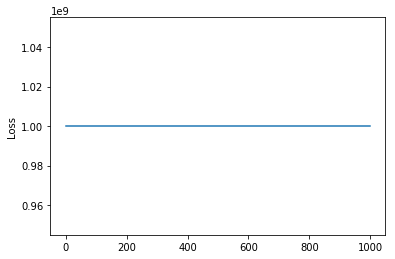

In [29]:
clf = SoftmaxClassifer(num_features, num_classes)
# TODO: Use cross-validations to find the optimal regularization_strength and step_size
opt = RandomSearch(classifier=clf, regularization_strength=0.000001)
loss_history = opt.train(X_train, y_train, nb_iter=1000, step_size=0.000001)
plt.plot(range(len(loss_history)), loss_history)
plt.ylabel('Iteration')
plt.ylabel('Loss')

print('Train accuracy:', accuracy_score(clf.predict(X_train), y_train))
print('Val accuracy:', accuracy_score(clf.predict(X_val), y_val))
print('Test accuracy:', accuracy_score(clf.predict(X_test), y_test))

In [ ]:
clf = SoftmaxClassifer(num_features, num_classes)
# TODO: Use cross-validations to find the optimal regularization_strength and step_size
opt = RandomLocalSearch(classifier=clf, regularization_strength=0.000001)
loss_history = opt.train(X_train, y_train, nb_iter=1000, step_size=0.000001)
plt.plot(range(len(loss_history)), loss_history)
plt.ylabel('Iteration')
plt.ylabel('Loss')

print('Train accuracy:', accuracy_score(clf.predict(X_train), y_train))
print('Val accuracy:', accuracy_score(clf.predict(X_val), y_val))
print('Test accuracy:', accuracy_score(clf.predict(X_test), y_test))

In [ ]:
clf = SoftmaxClassifer(num_features, num_classes)
# TODO: Use cross-validations to find the optimal regularization_strength and step_size
opt = GradientDescent(classifier=clf, regularization_strength=0.000001)
loss_history = opt.train(X_train, y_train, nb_iter=300, step_size=1e-8)
plt.plot(np.arange(len(loss_history)), loss_history)
plt.ylabel('Iteration')
plt.ylabel('Loss')

print('Train accuracy:', accuracy_score(clf.predict(X_train), y_train))
print('Val accuracy:', accuracy_score(clf.predict(X_val), y_val))
print('Test accuracy:', accuracy_score(clf.predict(X_test), y_test))

# Task 3: Numerical gradient computation

In [ ]:
def compute_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.00001
    
    #############################################################################
    # TODO: implement numerical gradient computation df/dx  
    # Numerical gradient computation might be very slow, since it requires loss
    # value computation for every dimension of point x.
    # Use tqdm to visualize the progress of the computation.
    #############################################################################
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    with tqdm(total=x.size) as pbar:
        
        while not it.finished:
            ix = it.multi_index
            # compute grad[ix] 
            grad[ix] = ((f(x+h) - fx) / ((x+h) - x))            
            
            it.iternext() # step to next dimension
            pbar.update(1)
        
    #############################################################################
    #                          END OF YOUR CODE                                 #
    #############################################################################
            
    

    return grad


# We need a single-argument loss function to use compute_numerical_gradient
def my_cifar10_loss_fn(W):
    return softmax_loss_vectorized(W, X_train, y_train, reg=0.0001)[0]


clf = SoftmaxClassifer(num_features, num_classes)
loss_initial = my_cifar10_loss_fn(clf.W) # the inital loss
print('Initial loss: %f' % (loss_initial, ))

# NOTE! May take up to 1-2 hours to compute! Be patient and use tqdm to track the progress
grad_f = compute_numerical_gradient(my_cifar10_loss_fn, clf.W)

best_loss = float("inf")
# lets see the effect of multiple step sizes
step_sizes = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1])
loss_values = np.zeros_like(step_sizes, dtype=np.float)
for i, step_size_log in tqdm(enumerate(step_sizes)):
    step_size = 10. ** step_size_log
    W_new = clf.W - step_size * grad_f # new position in the weight space
    loss_values[i] = my_cifar10_loss_fn(W_new)
    if loss_values[i] < best_loss:
        clf.W = W_new
        best_loss = loss_values[i]
                
print('Best loss: %f (with step size %f)' % (best_loss, step_sizes[np.argmin(loss_values)]))
    
plt.plot(step_sizes, loss_values)
plt.ylabel('Gradiend descent Step size')
plt.ylabel('Loss')

print('Train accuracy:', accuracy_score(clf.predict(X_train), y_train))
print('Val accuracy:', accuracy_score(clf.predict(X_val), y_val))
print('Test accuracy:', accuracy_score(clf.predict(X_test), y_test))